<div style="text-align: center;">
  <img src="./imagens/logo_novaims.png" alt="Logo" style="width: 150px; height: auto; margin-bottom: 10px;">
  <h1 style="margin: 0;"><strong>Machine Learning Project: Amazing International Airlines Inc.</strong></h1>
  <h2 style="margin: 0;"><strong>Part 1/2: Exploratory Data Analysis</strong></h2>
</div>

<div style="text-align: left; margin-top: 15px;">
  <p style="margin: 0;"><strong>Group 51:</strong></p>
  <ul style="margin: 0; padding-left: 20px;">
    <li>André Ferreira | 20250398</li>
    <li>Fausto Gomes | 20221915</li>
    <li>Maria Francisca Gonçalves | 20221942</li>
    <li>Miguel Matos | 20221925</li>
  </ul>
</div>

---
#### <font> Table of Contents </font> <a class="anchor" id='toc'></a> 
0. [Context](#introduction)
1. [Imports](#Imports)  
2. [Exploratory Data Analysis - Customer Data](#exploratory-data-analysis)

- 2.1. [Data Understanding](#21-data-understanding)
  - 2.1.1.[Descriptive Analysis](#descriptive-analysis)
  - 2.1.2.[Visualizations](#visualizations)

- 2.2. [GeoData](#geodata)

- 2.3. [Data Cleaning](#data-cleaning)



----

# <span style="color:#0097b2">0. Context</span>
[Back to TOC](#toc)

# <span style="color:#0097b2">1. Imports</span>
[Back to TOC](#toc)

In [59]:
from functions import *
customer_data = pd.read_csv("../data/raw/DM_AIAI_CustomerDB.csv", index_col = 0)
metadata = pd.read_csv("../data/raw/DM_AIAI_Metadata.csv", sep= ";")

pd.set_option("display.max_columns", None)

# <span style="color:#0097b2">2. Exploratory Data Analysis</span>

# <span style="color:#0097b2">2.1 Data Understanding</span>
[Back to TOC](#toc)

# <span style="color:#0097b2">Descriptive Analysis</span>
[Back to TOC](#toc)

In [60]:
customer_data.shape

(16921, 20)

In custoar data we have almost 17k entries.

In [61]:
customer_data.head()

Loyalty# First Name    Last Name        Customer Name Country  \
0    480934    Cecilia  Householder  Cecilia Householder  Canada   
1    549612      Dayle        Menez          Dayle Menez  Canada   
2    429460     Necole       Hannon        Necole Hannon  Canada   
3    608370      Queen        Hagee          Queen Hagee  Canada   
4    530508     Claire      Latting       Claire Latting  Canada   

  Province or State       City   Latitude   Longitude Postal code  Gender  \
0           Ontario    Toronto  43.653225  -79.383186     M2Z 4K1  female   
1           Alberta   Edmonton  53.544388 -113.490930     T3G 6Y6    male   
2  British Columbia  Vancouver  49.282730 -123.120740     V6E 3D9    male   
3           Ontario    Toronto  43.653225  -79.383186     P1W 1K4    male   
4            Quebec       Hull  45.428730  -75.713364     J8Y 3Z5    male   

  Education Location Code   Income Marital Status LoyaltyStatus  \
0  Bachelor         Urban  70146.0        Married          Star   
1   College         Rural      0.0       Divorced          Star   
2   College         Urban      0.0         Single          Star   
3   College      Suburban      0.0         Single          Star   
4  Bachelor      Suburban  97832.0        Married          Star   

  EnrollmentDateOpening CancellationDate  Customer Lifetime Value  \
0             2/15/2019              NaN                  3839.14   
1              3/9/2019              NaN                  3839.61   
2             7/14/2017         1/8/2021                  3839.75   
3             2/17/2016              NaN                  3839.75   
4            10/25/2017              NaN                  3842.79   

   EnrollmentType  
0        Standard  
1        Standard  
2        Standard  
3        Standard  
4  2021 Promotion

First insights from a small look at the data:
- Probably "Loyalty" works like an ID.

- Maybe we can drop the columns "First Name", "Last Name", "Customer Name" as they don't give any value.

- "Latitude" and "Longitude" will be useful to look for the customers location.

- "Postal Code" might have too many unique values and not give that much value, so maybe drop.

- "Location Code" is already the 5th variable about location, so maybe too redundant.

- "EnrollmentDateOpening" is to convert for days as customer.

In [62]:
customer_data.tail()

Loyalty# First Name Last Name    Customer Name Country Province or State  \
15    100012      Ethan  Thompson   Ethan Thompson  Canada            Quebec   
16    100013      Layla     Young      Layla Young  Canada           Alberta   
17    100014     Amelia   Bennett   Amelia Bennett  Canada     New Brunswick   
18    100015   Benjamin    Wilson  Benjamin Wilson  Canada            Quebec   
19    100016       Emma    Martin      Emma Martin  Canada  British Columbia   

            City   Latitude   Longitude Postal code  Gender Education  \
15   Quebec City  46.759733  -71.141009     Y0C 7D6    male  Bachelor   
16      Edmonton  53.524829 -113.546357     L3S 9Y3  female  Bachelor   
17       Moncton  46.051866  -64.825428     G2S 2B6    male  Bachelor   
18   Quebec City  46.862970  -71.133444     B1Z 8T3  female   College   
19  Dawson Creek  55.720562 -120.160090     M4A 1E4  female    Master   

   Location Code  Income Marital Status LoyaltyStatus EnrollmentDateOpening  \
15      Suburban     NaN         Single          Star             2/27/2019   
16         Rural     NaN        Married          Star             9/20/2017   
17         Rural     NaN        Married          Star            11/28/2020   
18         Urban     NaN        Married          Star              4/9/2020   
19      Suburban     NaN         Single          Star             7/21/2020   

   CancellationDate  Customer Lifetime Value EnrollmentType  
15        2/27/2019                      NaN       Standard  
16        9/20/2017                      NaN       Standard  
17       11/28/2020                      NaN       Standard  
18         4/9/2020                      NaN       Standard  
19        7/21/2020                      NaN       Standard

- In the column "CancellationDate" we can verify that there are customers that enrolled and canceled in the same day. We need to look at that.

- Here we can see that when the variable "Income" has a missing value, the variable "Customer Lifetime Value" has a missing value as well, and this happens when customers enter the program and exit in the same day, so this might be customers to remove, becasue they probably don't have flights in recorded in the flights data.

 - CLV = average value of sale x average number of transactions x average customer lifespan.

In [63]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16921 entries, 0 to 19
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loyalty#                 16921 non-null  int64  
 1   First Name               16921 non-null  object 
 2   Last Name                16921 non-null  object 
 3   Customer Name            16921 non-null  object 
 4   Country                  16921 non-null  object 
 5   Province or State        16921 non-null  object 
 6   City                     16921 non-null  object 
 7   Latitude                 16921 non-null  float64
 8   Longitude                16921 non-null  float64
 9   Postal code              16921 non-null  object 
 10  Gender                   16921 non-null  object 
 11  Education                16921 non-null  object 
 12  Location Code            16921 non-null  object 
 13  Income                   16901 non-null  float64
 14  Marital Status           16921

- All the dtypes seem to be accordingly, except to "EnrollmentDateOpening" and "CancellationDate" which should be a datetime data type.
- There are some missing values, let's take a closer look at it.

In [64]:
# Changing "EnrollmentDateOpening" and "CancellationDate" to datetime dtype to better explore the data in the future.
customer_data['EnrollmentDateOpening'] = pd.to_datetime(customer_data['EnrollmentDateOpening'], errors='coerce')
customer_data['CancellationDate'] = pd.to_datetime(customer_data['CancellationDate'], errors='coerce')

## Duplicates

In [65]:
customer_data[customer_data.duplicated(subset=["Loyalty#"])]

Loyalty# First Name  Last Name      Customer Name Country  \
370      354438      Marla   Heinicke     Marla Heinicke  Canada   
1986     687951      Burma    Cordill      Burma Cordill  Canada   
2322     615439     Thalia      Cabos       Thalia Cabos  Canada   
2416     156031       Onie      Grech         Onie Grech  Canada   
2442     825593       Rose   Mcgregor      Rose Mcgregor  Canada   
...         ...        ...        ...                ...     ...   
16488    373638    Sherryl    Vanduyn    Sherryl Vanduyn  Canada   
16625    727507     Marnie     Kisner      Marnie Kisner  Canada   
16766    278854    Marylee  Villicana  Marylee Villicana  Canada   
16775    434807       Cira     Nalley        Cira Nalley  Canada   
16881    368073    Enedina   Dickason   Enedina Dickason  Canada   

      Province or State         City   Latitude   Longitude Postal code  \
370             Ontario      Toronto  43.653225  -79.383186     M8Y 4K8   
1986             Quebec     Montreal  45.501690  -73.567253     H2Y 4R4   
2322            Ontario      Toronto  43.653225  -79.383186     P1J 8T7   
2416             Quebec     Montreal  45.501690  -73.567253     H2Y 2W2   
2442            Ontario      Toronto  43.653225  -79.383186     P5S 6R4   
...                 ...          ...        ...         ...         ...   
16488            Quebec    Tremblant  46.118462  -74.596184     H5Y 2S9   
16625           Alberta        Banff  51.178398 -115.570800     T4V 1D4   
16766            Quebec    Tremblant  46.118462  -74.596184     H5Y 2S9   
16775           Alberta     Edmonton  53.544388 -113.490930     T9G 1W3   
16881            Quebec  Quebec City  46.813877  -71.207977     G1B 3L5   

       Gender             Education Location Code   Income Marital Status  \
370      male              Bachelor         Rural  34640.0        Married   
1986     male              Bachelor         Rural  37751.0         Single   
2322   female              Bachelor         Urban  44698.0        Married   
2416   female              Bachelor         Urban  50825.0        Married   
2442   female  High School or Below      Suburban  24992.0        Married   
...       ...                   ...           ...      ...            ...   
16488  female               College         Rural      0.0         Single   
16625    male              Bachelor      Suburban  93011.0       Divorced   
16766  female  High School or Below         Urban  20799.0         Single   
16775    male              Bachelor         Rural  35296.0         Single   
16881    male              Bachelor         Urban  66661.0         Single   

      LoyaltyStatus EnrollmentDateOpening CancellationDate  \
370            Star            2015-07-11              NaT   
1986         Aurora            2021-07-29              NaT   
2322         Aurora            2017-10-21              NaT   
2416         Aurora            2019-05-24              NaT   
2442         Aurora            2020-05-18              NaT   
...             ...                   ...              ...   
16488          Star            2021-07-30              NaT   
16625          Star            2020-12-26              NaT   
16766          Star            2017-08-16              NaT   
16775          Star            2015-08-27              NaT   
16881          Star            2018-03-20              NaT   

       Customer Lifetime Value EnrollmentType  
370                    4530.53       Standard  
1986                   7249.07       Standard  
2322                   7918.33       Standard  
2416                   8092.88       Standard  
2442                   8139.00       Standard  
...                        ...            ...  
16488                 18898.33       Standard  
16625                 22643.83       Standard  
16766                 28328.47       Standard  
16775                 29194.37       Standard  
16881                 42561.63       Standard  

[164 rows x 20 columns]

There is 164 rows with duplicated "Loyalty#". We'll proceed to drop them.

In [66]:
customer_data = customer_data.drop_duplicates(subset='Loyalty#', keep='first')
customer_data[customer_data['Loyalty#'].duplicated()]

Empty DataFrame
Columns: [Loyalty#, First Name, Last Name, Customer Name, Country, Province or State, City, Latitude, Longitude, Postal code, Gender, Education, Location Code, Income, Marital Status, LoyaltyStatus, EnrollmentDateOpening, CancellationDate, Customer Lifetime Value, EnrollmentType]
Index: []

### Missing Values

In [67]:
customer_data.isna().sum()

Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14471
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64

- There are just 20 missing values in the variables "Income", which we'll look more in detail in the future.

- In "CancellationDate" there are 14611 missing values, that make sense, attending that the customers that never canceled the program don't have a date in this column.
- We also have 20 missing values in "Customer Lifetime Value", which might be related to the missing values in "Income" column, attending is the same number of missing values and attending some rows were we related that.

In [68]:
len(customer_data[(customer_data["Income"].isna()) & (customer_data["Customer Lifetime Value"].isna())])

20

In [69]:
customer_data[(customer_data["Income"].isna()) & (customer_data["Customer Lifetime Value"].isna())]

Loyalty# First Name Last Name    Customer Name Country Province or State  \
0     999987      Layla    Murphy     Layla Murphy  Canada     New Brunswick   
1     999988       Jana    Parker      Jana Parker  Canada            Quebec   
2     999989      Ethan    Parker     Ethan Parker  Canada           Ontario   
3     999990       Ryan  Anderson    Ryan Anderson  Canada     New Brunswick   
4     999991     Olivia      Cote      Olivia Cote  Canada     New Brunswick   
5     999992       Ella       Roy         Ella Roy  Canada           Ontario   
6     999993     Elijah      Cook      Elijah Cook  Canada  British Columbia   
7     999994      Ethan      Chan       Ethan Chan  Canada           Ontario   
8     999995       Liam      Wong        Liam Wong  Canada           Ontario   
9     999996   Isabella      Ross    Isabella Ross  Canada           Ontario   
10    999997      Grace    Miller     Grace Miller  Canada     New Brunswick   
11    999998       Noah  Thompson    Noah Thompson  Canada            Quebec   
12    999999       Noah    Walker      Noah Walker  Canada           Alberta   
13    100017      Grace    Fortin     Grace Fortin  Canada  British Columbia   
14    100011     Amelia      Ross      Amelia Ross  Canada           Ontario   
15    100012      Ethan  Thompson   Ethan Thompson  Canada            Quebec   
16    100013      Layla     Young      Layla Young  Canada           Alberta   
17    100014     Amelia   Bennett   Amelia Bennett  Canada     New Brunswick   
18    100015   Benjamin    Wilson  Benjamin Wilson  Canada            Quebec   
19    100016       Emma    Martin      Emma Martin  Canada  British Columbia   

            City   Latitude   Longitude Postal code  Gender Education  \
0    Fredericton  46.029263  -66.565150     R4H 2Y2  female  Bachelor   
1       Montreal  45.573672  -73.523012     N6B 1N3    male   College   
2        Trenton  44.075379  -77.550375     P8F 5C8    male   College   
3        Moncton  46.106617  -64.714267     B6P 6D0  female   College   
4    Fredericton  45.950000  -66.652437     X3W 5N2  female   College   
5        Toronto  43.706878  -79.437412     P6D 6N2    male   College   
6   Dawson Creek  55.701475 -120.181716     W6H 0Z7  female   College   
7         Ottawa  45.365906  -75.723181     B2F 3E1  female   College   
8         Ottawa  45.471557  -75.704868     B3A 2R0  female   College   
9        Toronto  43.690489  -79.436758     B4W 4M6  female  Bachelor   
10       Moncton  46.067243  -64.729480     S5R 0X5    male   College   
11   Quebec City  46.749897  -71.238050     K7T 9I9    male  Bachelor   
12      Edmonton  53.549353 -113.509109     S7D 0V1    male  Bachelor   
13  Dawson Creek  55.751178 -120.264920     E0K 5I2    male    Master   
14       Toronto  43.593187  -79.444335     W9D 4Q9  female  Bachelor   
15   Quebec City  46.759733  -71.141009     Y0C 7D6    male  Bachelor   
16      Edmonton  53.524829 -113.546357     L3S 9Y3  female  Bachelor   
17       Moncton  46.051866  -64.825428     G2S 2B6    male  Bachelor   
18   Quebec City  46.862970  -71.133444     B1Z 8T3  female   College   
19  Dawson Creek  55.720562 -120.160090     M4A 1E4  female    Master   

   Location Code  Income Marital Status LoyaltyStatus EnrollmentDateOpening  \
0          Urban     NaN         Single          Star            2017-03-07   
1          Rural     NaN         Single          Star            2017-08-22   
2          Rural     NaN        Married          Star            2015-09-12   
3          Rural     NaN        Married          Star            2019-06-10   
4       Suburban     NaN        Married          Star            2019-07-20   
5       Suburban     NaN         Single          Star            2021-03-27   
6       Suburban     NaN        Married          Star            2015-01-27   
7          Rural     NaN        Married          Star            2016-05-05   
8       Suburban     NaN        Married          Star            2020-03-02   

We have the confirmation that the customers with missing values in "Income" are the same with missing values in "Customer Lifetime Values". In further work of preprocessing, we will likely fill these missing values with central tendency measures(e.g. median, mean) of customers that have the same "Status", "City", "Education", basically, have similar attributes.

In [70]:
customer_data.describe(include= np.number).drop("Loyalty#", axis = 1)

Latitude     Longitude        Income  Customer Lifetime Value
count  16757.000000  16757.000000  16737.000000             16737.000000
mean      47.176825    -91.826873  37749.877696              7988.896536
std        3.307562     22.244502  30370.336552              6860.982280
min       42.984924   -135.056840      0.000000              1898.010000
25%       44.231171   -120.237660      0.000000              3980.840000
50%       46.087818    -79.383186  34148.000000              5780.180000
75%       49.282730    -74.596184  62396.000000              8940.580000
max       60.721188    -52.712578  99981.000000             83325.380000

- The variance in "Income" variable is extremely high, specially due to the fact of the minimum being 0.

- "Customer Lifetime Value" seems to have a similar behaviour as "Income", probabluy because this two features might be very correlated.

In [71]:
customer_data.describe(exclude= np.number)

First Name Last Name        Customer Name Country Province or State  \
count       16757     16757                16757   16757             16757   
unique       4935     15263                16757       1                11   
top        Stacey     Ypina  Cecilia Householder  Canada           Ontario   
freq           13         4                    1   16757              5410   
mean          NaN       NaN                  NaN     NaN               NaN   
min           NaN       NaN                  NaN     NaN               NaN   
25%           NaN       NaN                  NaN     NaN               NaN   
50%           NaN       NaN                  NaN     NaN               NaN   
75%           NaN       NaN                  NaN     NaN               NaN   
max           NaN       NaN                  NaN     NaN               NaN   

           City Postal code  Gender Education Location Code Marital Status  \
count     16757       16757   16757     16757         16757          16757   
unique       29          75       2         5             3              3   
top     Toronto     V6E 3D9  female  Bachelor      Suburban        Married   
freq       3354         911    8421     10483          5659           9747   
mean        NaN         NaN     NaN       NaN           NaN            NaN   
min         NaN         NaN     NaN       NaN           NaN            NaN   
25%         NaN         NaN     NaN       NaN           NaN            NaN   
50%         NaN         NaN     NaN       NaN           NaN            NaN   
75%         NaN         NaN     NaN       NaN           NaN            NaN   
max         NaN         NaN     NaN       NaN           NaN            NaN   

       LoyaltyStatus          EnrollmentDateOpening  \
count          16757                          16757   
unique             3                            NaN   
top             Star                            NaN   
freq            7657                            NaN   
mean             NaN  2018-10-06 16:51:00.977501952   
min              NaN            2015-01-27 00:00:00   
25%              NaN            2017-01-18 00:00:00   
50%              NaN            2018-11-02 00:00:00   
75%              NaN            2020-07-09 00:00:00   
max              NaN            2021-12-30 00:00:00   

                     CancellationDate EnrollmentType  
count                            2286          16757  
unique                            NaN              2  
top                               NaN       Standard  
freq                              NaN          15614  
mean    2019-12-14 03:19:03.307086848            NaN  
min               2015-01-27 00:00:00            NaN  
25%               2019-01-29 00:00:00            NaN  
50%               2020-01-12 12:00:00            NaN  
75%               2021-02-14 00:00:00            NaN  
max               2021-12-30 00:00:00            NaN

- "Country" is a variable that we'll probably delete as well, as we can see by here it only contains the value "Canada".

- "Location Code" seems to be important as only contains 3 unique values.

- "City" and "Postal code" might be irrelevant compared to other variables we have.


There a lot of categorical values, but let's take a look at the unique values.

In [72]:
non_metric_features = customer_data.select_dtypes(exclude= np.number).drop(["First Name","Last Name","Customer Name", "Country", "EnrollmentDateOpening","CancellationDate"], axis = 1)
for feature in non_metric_features:
    print(f"The unique values of {feature} are: \n\n {customer_data[feature].unique()} \n")

The unique values of Province or State are: 

 ['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island'] 

The unique values of City are: 

 ['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Moncton' 'Fredericton' 'Ottawa' 'Tremblant'
 'Calgary' 'Whistler' 'Thunder Bay' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Victoria' 'Regina' 'Kelowna'
 "St. John's" 'Kingston' 'Banff' 'Charlottetown'] 

The unique values of Postal code are: 

 ['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'Y2K 6R0' 'P5S 6R4'
 'K8V 4B2' 'H2Y 2W2' 'M8Y 4K8' 'U5I 4F1' 'G1B 3L5' 'H4G 3T4' 'M2M 7K8'
 'M2M 6J7' 'E1A 2A7' 'E3B 2H2' 'M1R 4K3' 'T9G 1W3' 'H2Y 4R4' 'V5R 1W3'
 'P1L 8X8' 'K1F 2R2' 'H5Y 2S9' 'V1E 4R6' 'H2T 2J6' 'T3E 2V9' 'V6T 1Y8'
 'H2T 9K8' 'K8T 5M5' 'P2T 6G3' 'T9O 2W2' 'V6E 3Z3' 'R6Y 4T5' 'M5V 1G5'
 'V6V 8Z3' 'B3J 9S2' 'M5B 3

It seems there are no typos in the categorical features unique values.

## "Postal code" column

Each postal code represents on average a small number of customers, due to the high number of unique values, so let's see if the column has some relevancy.

In [73]:
customer_data.groupby(by="Postal code")["Customer Lifetime Value"].mean().sort_values(ascending= False).dropna()

Postal code
M3R 4K8    10654.420000
H3J 5I6    10031.425714
S1J 3C5     8975.062295
H3T 8L4     8815.690449
V6T 1Y8     8769.007852
M2P 4F6     8568.837063
H2T 9K8     8512.106273
K8T 5M5     8501.457539
P5S 6R4     8462.619472
H2Y 4R4     8416.541770
R2C 0M5     8371.315738
V09 2E9     8302.205625
H4G 3T4     8287.914142
M5V 1G5     8287.070749
H2Y 2W2     8283.645014
E3B 2H2     8212.598588
M2M 6J7     8205.334902
K1F 2R2     8182.133496
P1J 8T7     8172.683200
V10 6T5     8160.126093
J8Y 3Z5     8074.380419
T9G 1W3     8068.302826
U5I 4F1     8043.200661
E1A 2A7     8036.520284
A1C 6H9     8025.080349
V6E 3Z3     7993.401903
B3J 9S2     7993.311552
M2Z 4K1     7966.928755
G1B 3L5     7965.855430
V5R 1W3     7961.567997
B3C 2M8     7917.464100
H2T 2J6     7870.041749
M8Y 4K8     7847.657618
T3G 6Y6     7838.028142
M9K 2P4     7805.839102
M5B 3E4     7804.455517
T9O 2W2     7801.774071
P1L 8X8     7800.791667
K8V 4B2     7787.729630
M2M 7K8     7786.778427
R6Y 4T5     7759.343403
T3E 

Attending that the average Custumer Lifetime value ranges between 10k and 7k, it means that these values are more less between the 2nd and 3rd quartile, which tells us that there is no big differenciation and a determining factor between postal codes.

In [74]:
customer_data.groupby(by="Postal code")["Income"].mean().sort_values(ascending= False).dropna()

Postal code
B3C 2M8    43410.325000
T9O 2W2    41284.610619
V6V 8Z3    41153.810897
M8Y 4K8    40904.455882
G1B 3L5    40342.115304
V09 2E9    40306.137500
T9G 1W3    40191.996377
V1E 4R6    40146.706546
E1A 2A7    40068.729858
C1A 6E8    39734.590909
M2M 7K8    39229.202247
H3T 8L4    39155.449438
M2P 4F6    38968.595238
B3J 9S2    38824.161194
S1J 3C5    38637.907104
H2Y 2W2    38634.753425
U5I 4F1    38602.933941
P1J 8T7    38196.016000
M2Z 4K1    38195.482490
H5Y 2S9    38097.104592
K8V 4B2    37746.300412
S6J 3G0    37686.469027
P5S 6R4    37675.792683
P1L 8X8    37669.436170
R2C 0M5    37617.501171
V6E 3D9    37591.807903
P1W 1K4    37547.240000
V5R 1W3    37427.441520
H2T 2J6    37408.955157
H2Y 4R4    37313.157377
M9K 2P4    37284.635910
V6E 3Z3    37267.550373
A1C 6H9    37189.131783
K1F 2R2    37160.776350
H2T 9K8    37102.482966
P2T 6G3    37073.658385
E3B 2H2    36800.044706
V6T 1Y8    36754.740550
T3E 2V9    36591.317708
J8Y 3Z5    36567.444134
M1R 4K3    36560.466454
K8T 

There are two specific Postal codes with low income average.

In [75]:
customer_data[customer_data["Postal code"] == "M3R 4K8"]

Loyalty# First Name Last Name  Customer Name Country Province or State  \
9564     330278       Etha    Barlau    Etha Barlau  Canada           Ontario   
11515    250311      Karry   Mceaddy  Karry Mceaddy  Canada           Ontario   
15296    838232      Jayna      Tiso     Jayna Tiso  Canada           Ontario   

          City   Latitude  Longitude Postal code  Gender Education  \
9564   Toronto  43.653225 -79.383186     M3R 4K8  female    Doctor   
11515  Toronto  43.653225 -79.383186     M3R 4K8  female    Doctor   
15296  Toronto  43.653225 -79.383186     M3R 4K8    male   College   

      Location Code   Income Marital Status LoyaltyStatus  \
9564          Rural  15529.0        Married          Nova   
11515         Urban  23170.0       Divorced          Star   
15296         Urban      0.0         Single          Star   

      EnrollmentDateOpening CancellationDate  Customer Lifetime Value  \
9564             2018-06-03              NaT                 20725.38   
11515            2015-10-02              NaT                  2646.57   
15296            2019-02-23              NaT                  8591.31   

      EnrollmentType  
9564        Standard  
11515       Standard  
15296       Standard

In [76]:
customer_data[customer_data["Postal code"] == "H3J 5I6"]

Loyalty# First Name Last Name    Customer Name Country  \
5348     737940     Carley     Toten     Carley Toten  Canada   
9148     395324    Cristin   Wommack  Cristin Wommack  Canada   
9312     912939     Brande    Rempel    Brande Rempel  Canada   
10903    659607     Corrie    Swiney    Corrie Swiney  Canada   
11735    282532      Daina      Nall       Daina Nall  Canada   
15310    439566     Eugene    Synder    Eugene Synder  Canada   
16679    867289    Carmina     Durig    Carmina Durig  Canada   

      Province or State      City  Latitude  Longitude Postal code  Gender  \
5348             Quebec  Montreal  45.50169 -73.567253     H3J 5I6  female   
9148             Quebec  Montreal  45.50169 -73.567253     H3J 5I6    male   
9312             Quebec  Montreal  45.50169 -73.567253     H3J 5I6    male   
10903            Quebec  Montreal  45.50169 -73.567253     H3J 5I6  female   
11735            Quebec  Montreal  45.50169 -73.567253     H3J 5I6  female   
15310            Quebec  Montreal  45.50169 -73.567253     H3J 5I6    male   
16679            Quebec  Montreal  45.50169 -73.567253     H3J 5I6  female   

                  Education Location Code   Income Marital Status  \
5348               Bachelor         Urban  84493.0        Married   
9148                College         Rural      0.0         Single   
9312               Bachelor         Rural  20656.0         Single   
10903  High School or Below         Rural  14906.0        Married   
11735               College         Urban      0.0        Married   
15310              Bachelor         Rural  37277.0        Married   
16679                Doctor         Rural  14710.0         Single   

      LoyaltyStatus EnrollmentDateOpening CancellationDate  \
5348           Nova            2019-10-19              NaT   
9148           Nova            2017-04-15              NaT   
9312           Nova            2020-10-13       2021-08-10   
10903          Star            2016-04-10              NaT   
11735          Star            2021-06-28              NaT   
15310          Star            2019-03-18              NaT   
16679          Star            2017-02-06              NaT   

       Customer Lifetime Value EnrollmentType  
5348                   3705.29       Standard  
9148                  13379.81       Standard  
9312                  15120.21       Standard  
10903                  2511.70       Standard  
11735                  2703.27       Standard  
15310                  8613.46       Standard  
16679                 24186.24       Standard

They represent a vrey insignificant number of customers, so it's not relevant.

In [77]:
customer_data.groupby(by="Postal code")["Income"].mean()[customer_data.groupby(by="Postal code")["Income"].mean().isna()]

Postal code
B1Z 8T3   NaN
B2F 3E1   NaN
B3A 2R0   NaN
B4W 4M6   NaN
B6P 6D0   NaN
E0K 5I2   NaN
G2S 2B6   NaN
K7T 9I9   NaN
L3S 9Y3   NaN
M4A 1E4   NaN
N6B 1N3   NaN
P6D 6N2   NaN
P8F 5C8   NaN
R4H 2Y2   NaN
S5R 0X5   NaN
S7D 0V1   NaN
W6H 0Z7   NaN
W9D 4Q9   NaN
X3W 5N2   NaN
Y0C 7D6   NaN
Name: Income, dtype: float64

In [78]:
customer_data[customer_data["Postal code"] == "B1Z 8T3"]

Loyalty# First Name Last Name    Customer Name Country Province or State  \
18    100015   Benjamin    Wilson  Benjamin Wilson  Canada            Quebec   

           City  Latitude  Longitude Postal code  Gender Education  \
18  Quebec City  46.86297 -71.133444     B1Z 8T3  female   College   

   Location Code  Income Marital Status LoyaltyStatus EnrollmentDateOpening  \
18         Urban     NaN        Married          Star            2020-04-09   

   CancellationDate  Customer Lifetime Value EnrollmentType  
18       2020-04-09                      NaN       Standard

Also when the average income is a missing value only represents a missing value, so it's a candidate column to be dropped.

## "City" column

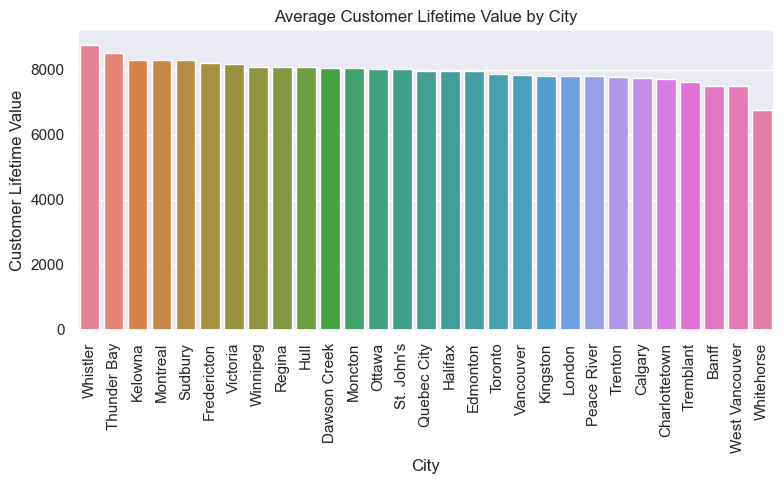

In [79]:
num_per_cat(customer_data, "Customer Lifetime Value", "City", 90)

This column might be to delete, but in order to have full conviction of it, we need to acess this with the flights data already merged.

# <span style="color:#0097b2">Visualizations</span>
[Back to TOC](#toc)

 ---
### Numeric features
 ---

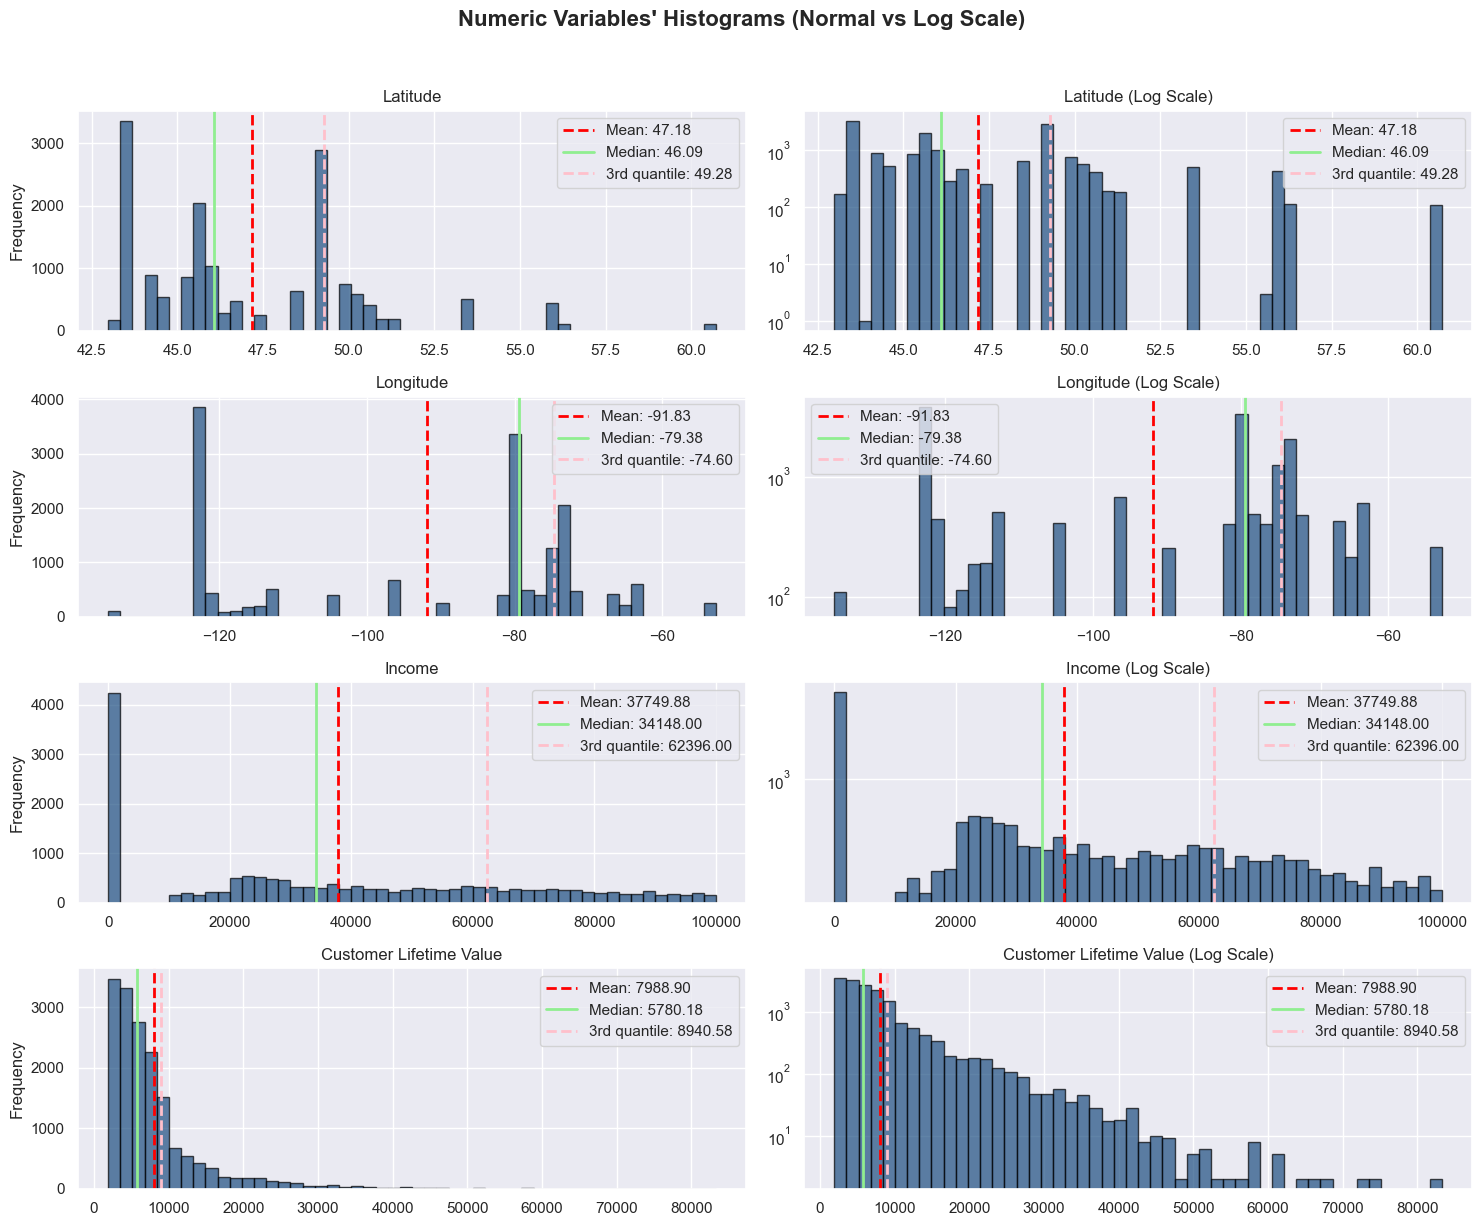

In [80]:
# Plot ALL Numeric Variables' Histograms in one figure
sns.set(style= "darkgrid")

metric_features = customer_data.select_dtypes(include=np.number).drop(columns=["Loyalty#"])

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(4, 2, figsize=(15, 12))

# Loop through each feature
for i, feat in enumerate(metric_features):

    # Calculate mean and median
    mean_val = customer_data[feat].mean()
    median_val = customer_data[feat].median()
    third_quantile = customer_data[feat].quantile(0.75)
    
    # Left plot: normal histogram
    axes[i, 0].hist(customer_data[feat], bins = 50, edgecolor= "black", alpha = 0.7, color = "#1d4e81")
    axes[i, 0].set_title(f"{feat}")
    axes[i, 0].set_ylabel("Frequency")
    axes[i, 0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i, 0].axvline(median_val, color='lightgreen', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[i, 0].axvline(third_quantile, color='pink', linestyle='--', linewidth=2, label=f'3rd quantile: {third_quantile:.2f}')
    axes[i, 0].legend()

    # Right plot: log-scale histogram
    axes[i, 1].hist(customer_data[feat], bins= 50, log = True, edgecolor= "black", alpha = 0.7, color = "#1d4e81")
    axes[i, 1].set_title(f"{feat} (Log Scale)")
    axes[i, 1].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i, 1].axvline(median_val, color='lightgreen', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[i, 1].axvline(third_quantile, color='pink', linestyle='--', linewidth=2, label=f'3rd quantile: {third_quantile:.2f}')
    axes[i, 1].legend()

# Adjust layout and add overall title
fig.suptitle("Numeric Variables' Histograms (Normal vs Log Scale)", fontsize=16, y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()

- "Latitude": It seems like there are not a lot of unique values on this variable, but we can verify that there are more customers in the latitude around 43 and 48.

- "Longitude": Like "Latitude", it seems like there are not a lot of unique values on this variable, but we can verify that there are more customers in the Longitude around -120 and -80.

- "Income": The most common value is 0 by far, which is influentiating the mean for a lot, so it would be interesting to visualize this graph again, but without the zero's values.

- "Customer Lifetime Value": Is a right skewed graph, where most data lays down bellow 9 thousand, but still having some really high values, above 20 thousand and even above 40 thousand.

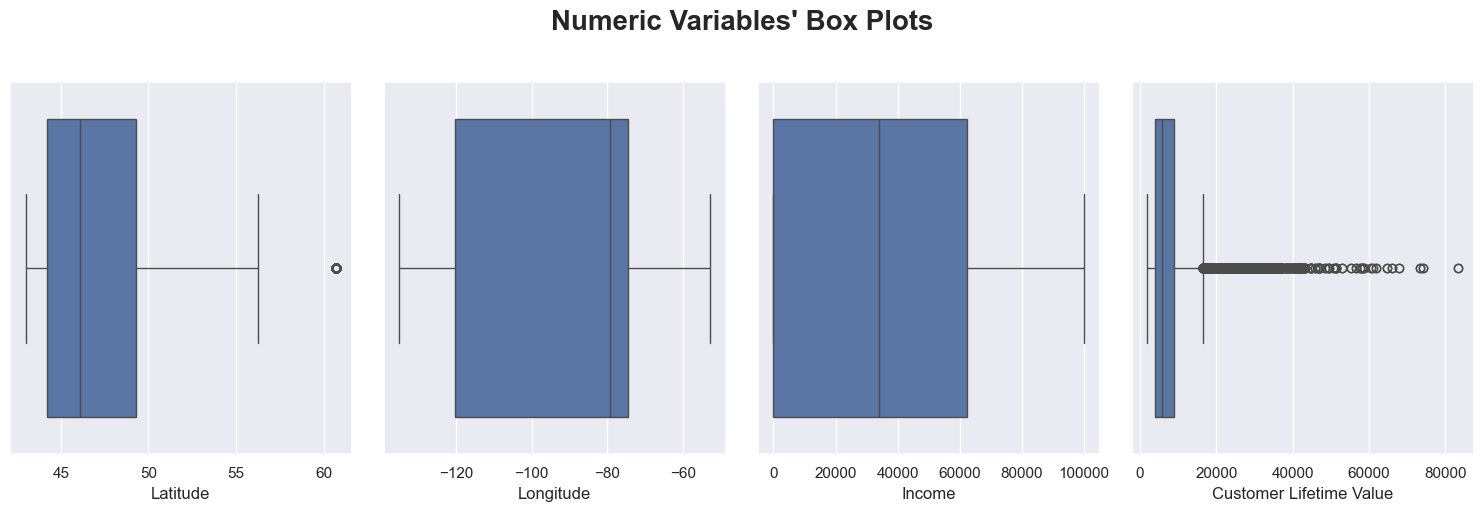

In [81]:
# Plot ALL Numeric Variables' Histograms in one figure

sns.set(style= "darkgrid", context= "notebook") ## Reset to darkgrid

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(1, 4, figsize=(15, 5),tight_layout=True)

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=customer_data[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
plt.suptitle("Numeric Variables' Box Plots", fontsize=20, y=1.02, fontweight='bold')
plt.show()

- "Latitude": Tells that most customer live in the south of Canada, with some people living more to the north, and even containing an outlier in the north.

- "Longitude": Have no outliers.

- "Income": as seen before, is mostly equally distributed, but has that big spike at 0 that influenciates a lot the graph.

- "Customer Lifetime Value": A really right skewed variable, as the boxplot confirms, having a lot of severe outliers, that represents pontetial very valuable customers.

### Zero Income Customers

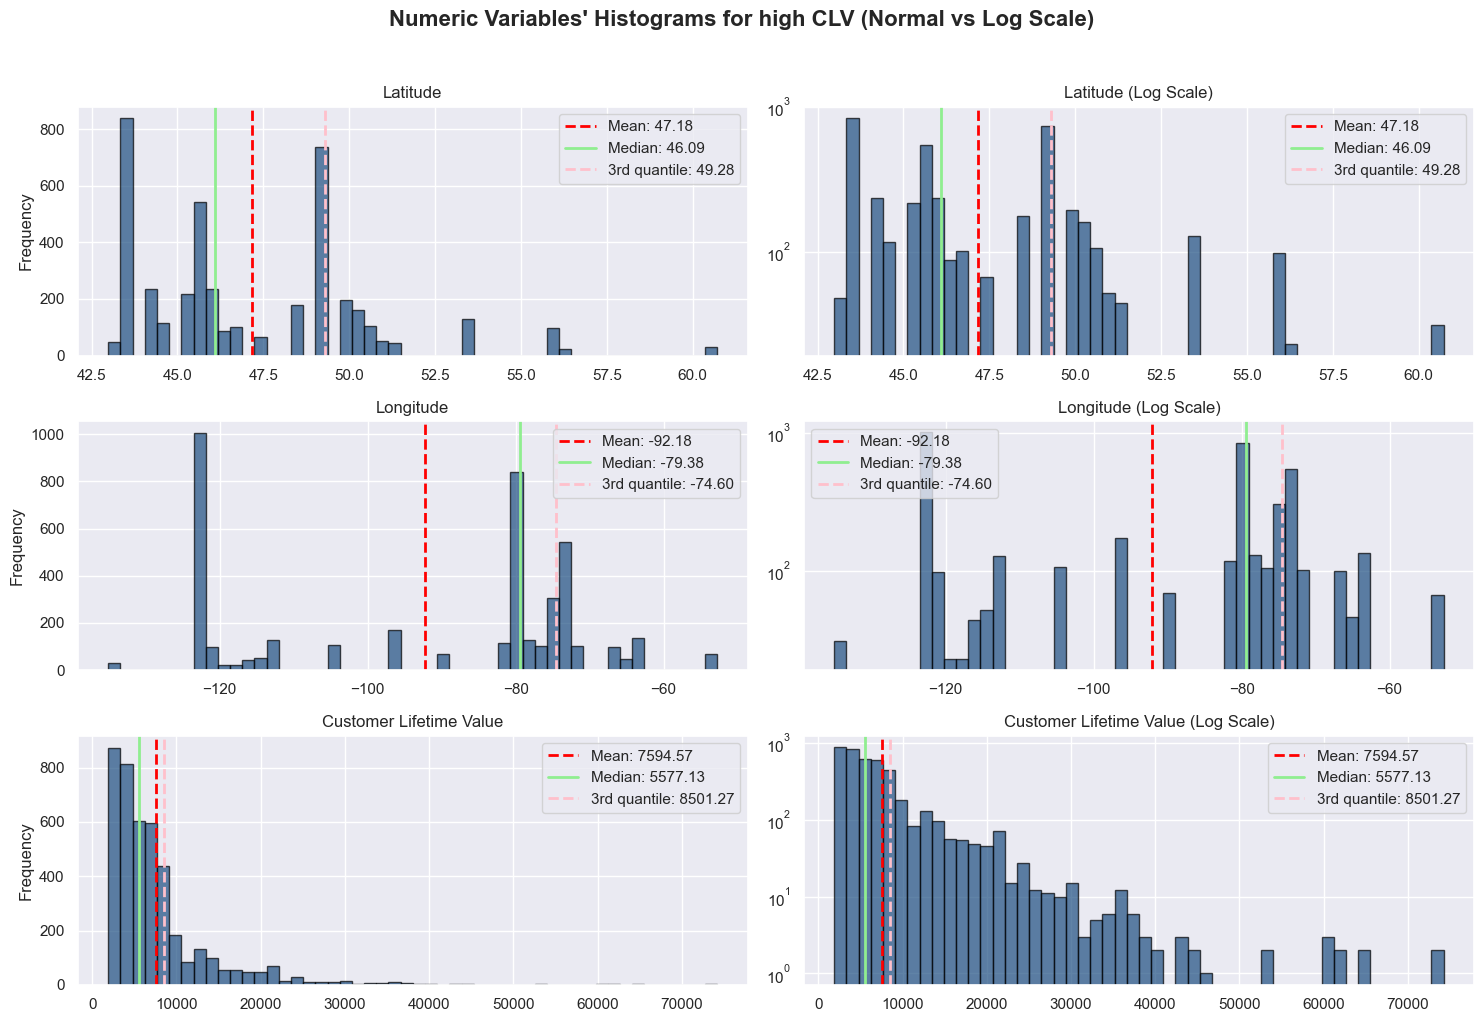

In [82]:
zero_inc_cust = customer_data[customer_data["Income"] == 0]

# Plot ALL Numeric Variables' Histograms in one figure
sns.set(style= "darkgrid")

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Loop through each feature
for i, feat in enumerate(metric_features.drop("Income", axis=1)):

    # Calculate mean and median
    mean_val = zero_inc_cust[feat].mean()
    median_val = zero_inc_cust[feat].median()
    third_quantile = zero_inc_cust[feat].quantile(0.75)
    
    # Left plot: normal histogram
    axes[i, 0].hist(zero_inc_cust[feat], bins = 50, edgecolor= "black", alpha = 0.7, color = "#1d4e81")
    axes[i, 0].set_title(f"{feat}")
    axes[i, 0].set_ylabel("Frequency")
    axes[i, 0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i, 0].axvline(median_val, color='lightgreen', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[i, 0].axvline(third_quantile, color='pink', linestyle='--', linewidth=2, label=f'3rd quantile: {third_quantile:.2f}')
    axes[i, 0].legend()

    # Right plot: log-scale histogram
    axes[i, 1].hist(zero_inc_cust[feat], bins= 50, log = True, edgecolor= "black", alpha = 0.7, color = "#1d4e81")
    axes[i, 1].set_title(f"{feat} (Log Scale)")
    axes[i, 1].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i, 1].axvline(median_val, color='lightgreen', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[i, 1].axvline(third_quantile, color='pink', linestyle='--', linewidth=2, label=f'3rd quantile: {third_quantile:.2f}')
    axes[i, 1].legend()

# Adjust layout and add overall title
fig.suptitle("Numeric Variables' Histograms for high CLV (Normal vs Log Scale)", fontsize=16, y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()

Insights:

- There are no major differences between the customers with zero of income, compared with the ones with incomes above 0.

### High Customer Lifetime Value customers

There are 1764 customers with CLV above 15k.


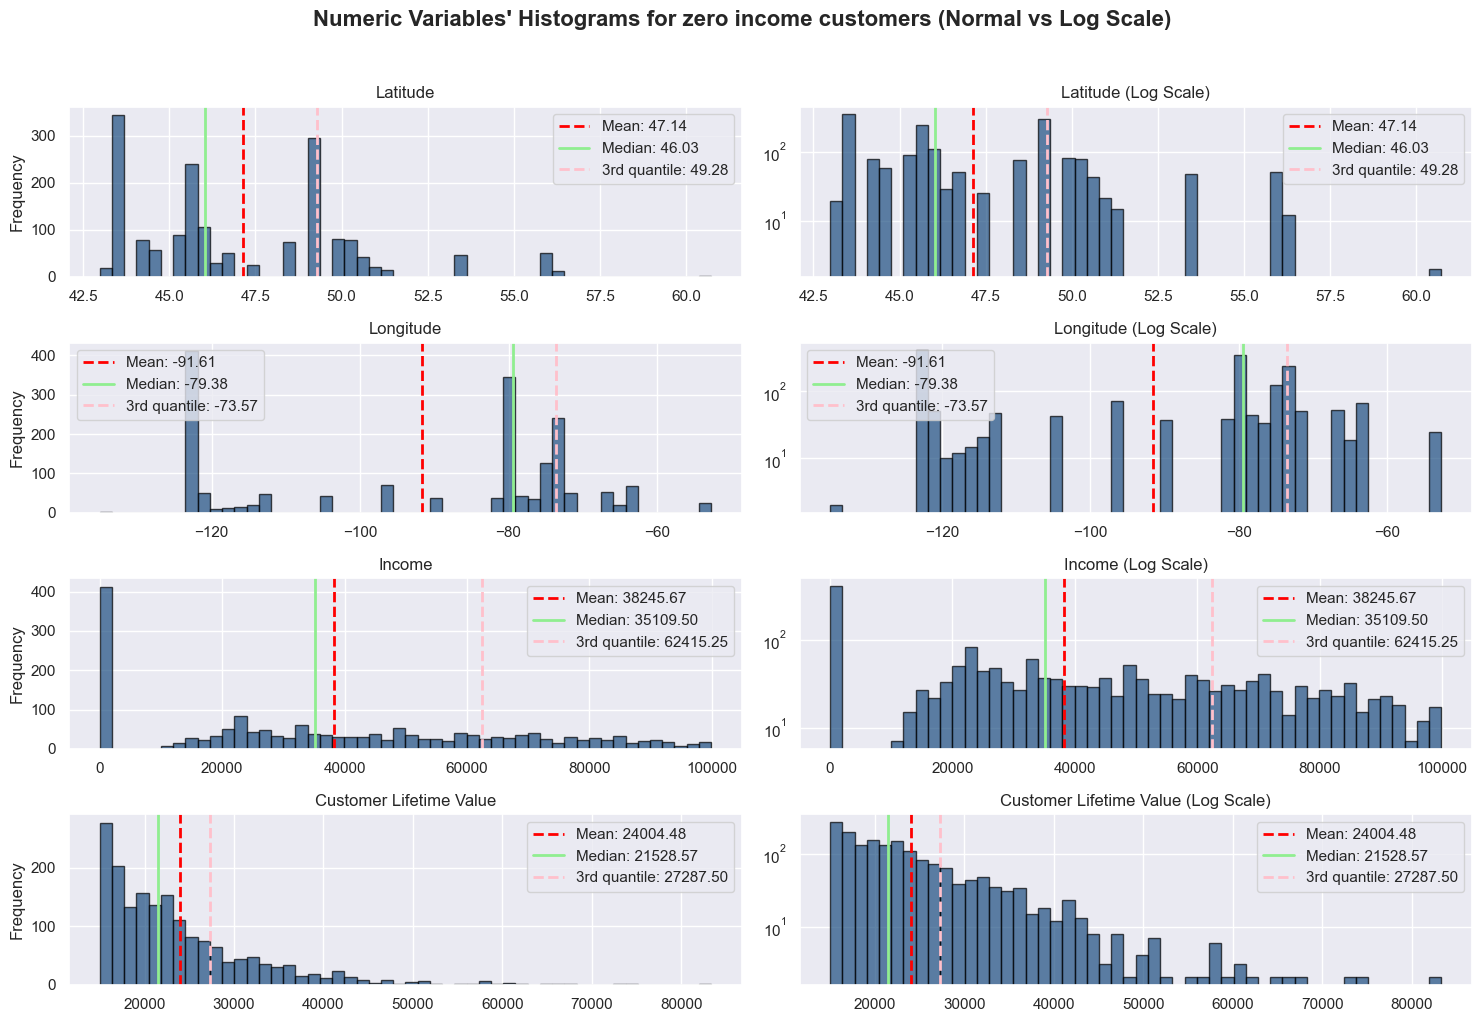

In [83]:
high_CLV_cust = customer_data[customer_data["Customer Lifetime Value"] > 15000]

print(f"There are {len(high_CLV_cust)} customers with CLV above 15k.")

# Plot ALL Numeric Variables' Histograms in one figure
sns.set(style= "darkgrid")

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(4, 2, figsize=(15, 10))

# Loop through each feature
for i, feat in enumerate(metric_features):

    # Calculate mean and median
    mean_val = high_CLV_cust[feat].mean()
    median_val = high_CLV_cust[feat].median()
    third_quantile = high_CLV_cust[feat].quantile(0.75)
    
    # Left plot: normal histogram
    axes[i, 0].hist(high_CLV_cust[feat], bins = 50, edgecolor= "black", alpha = 0.7, color = "#1d4e81")
    axes[i, 0].set_title(f"{feat}")
    axes[i, 0].set_ylabel("Frequency")
    axes[i, 0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i, 0].axvline(median_val, color='lightgreen', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[i, 0].axvline(third_quantile, color='pink', linestyle='--', linewidth=2, label=f'3rd quantile: {third_quantile:.2f}')
    axes[i, 0].legend()

    # Right plot: log-scale histogram
    axes[i, 1].hist(high_CLV_cust[feat], bins= 50, log = True, edgecolor= "black", alpha = 0.7, color = "#1d4e81")
    axes[i, 1].set_title(f"{feat} (Log Scale)")
    axes[i, 1].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i, 1].axvline(median_val, color='lightgreen', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[i, 1].axvline(third_quantile, color='pink', linestyle='--', linewidth=2, label=f'3rd quantile: {third_quantile:.2f}')
    axes[i, 1].legend()

# Adjust layout and add overall title
fig.suptitle("Numeric Variables' Histograms for zero income customers (Normal vs Log Scale)", fontsize=16, y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()

Insights:

- They seem to have similar distributions compared to the whole dataset. We should take a look afterwards with the whole dataset gathered.

### 2021 promotion customers

Maybe these customers have lowers incomes.

There are 1143 customers that joined the program in the 2021 promotion.


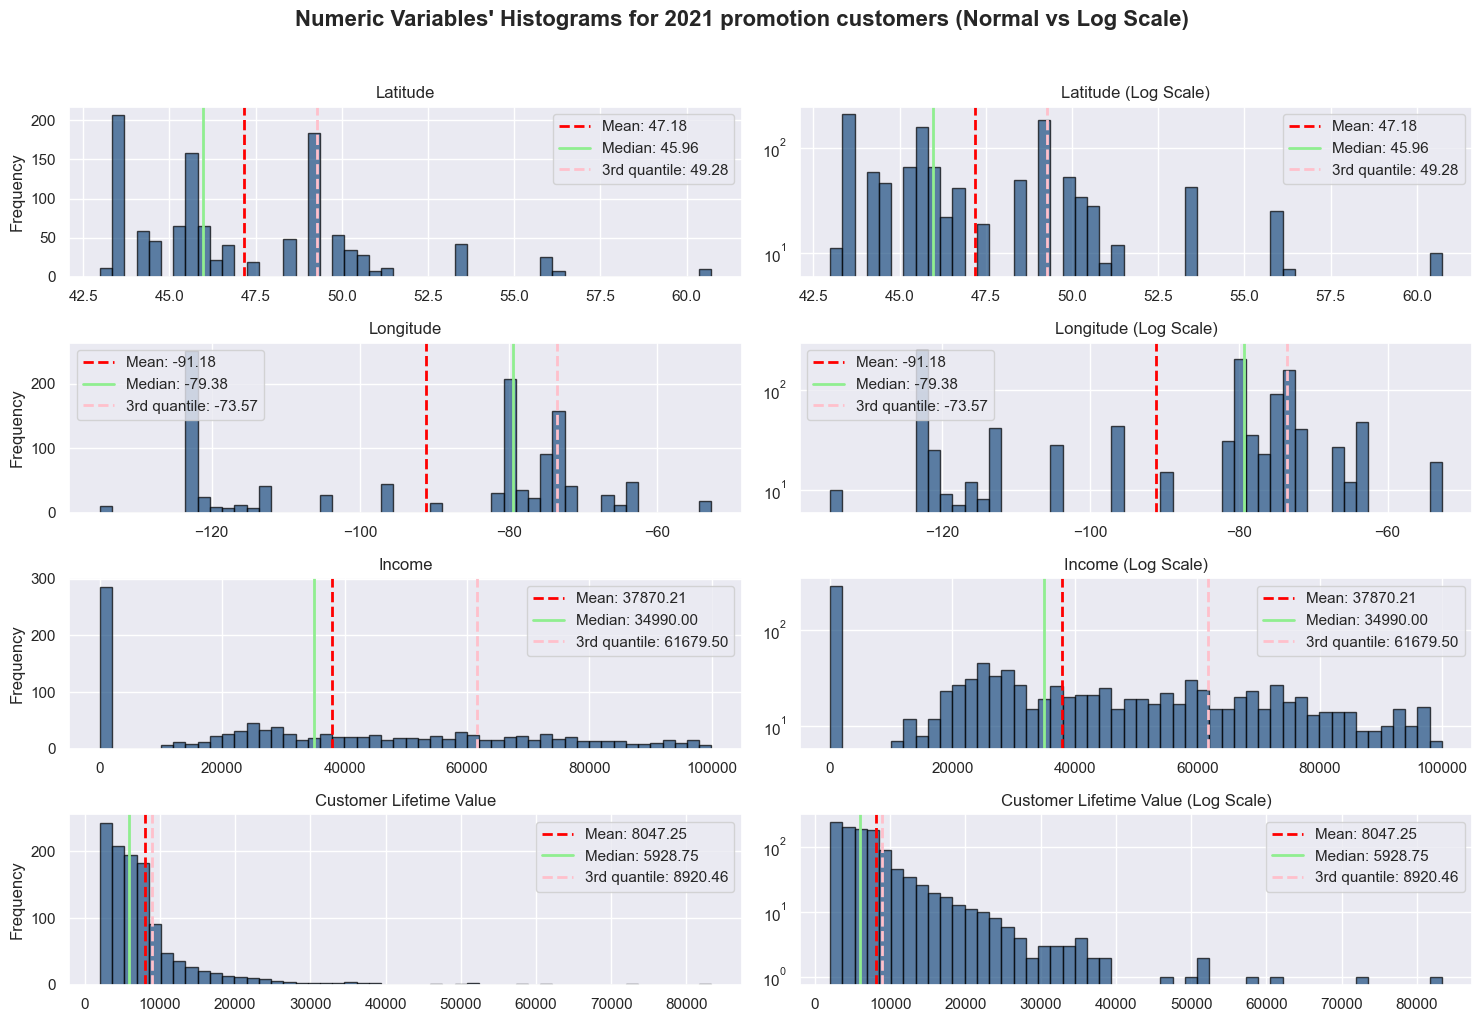

In [84]:
customers_2021_promo = customer_data[customer_data["EnrollmentType"] == "2021 Promotion"]

print(f"There are {len(customers_2021_promo)} customers that joined the program in the 2021 promotion.")

# Plot ALL Numeric Variables' Histograms in one figure
sns.set(style= "darkgrid")

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(4, 2, figsize=(15, 10))

# Loop through each feature
for i, feat in enumerate(metric_features):

    # Calculate mean and median
    mean_val = customers_2021_promo[feat].mean()
    median_val = customers_2021_promo[feat].median()
    third_quantile = customers_2021_promo[feat].quantile(0.75)
    
    # Left plot: normal histogram
    axes[i, 0].hist(customers_2021_promo[feat], bins = 50, edgecolor= "black", alpha = 0.7, color = "#1d4e81")
    axes[i, 0].set_title(f"{feat}")
    axes[i, 0].set_ylabel("Frequency")
    axes[i, 0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i, 0].axvline(median_val, color='lightgreen', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[i, 0].axvline(third_quantile, color='pink', linestyle='--', linewidth=2, label=f'3rd quantile: {third_quantile:.2f}')
    axes[i, 0].legend()

    # Right plot: log-scale histogram
    axes[i, 1].hist(customers_2021_promo[feat], bins= 50, log = True, edgecolor= "black", alpha = 0.7, color = "#1d4e81")
    axes[i, 1].set_title(f"{feat} (Log Scale)")
    axes[i, 1].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i, 1].axvline(median_val, color='lightgreen', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[i, 1].axvline(third_quantile, color='pink', linestyle='--', linewidth=2, label=f'3rd quantile: {third_quantile:.2f}')
    axes[i, 1].legend()

# Adjust layout and add overall title
fig.suptitle("Numeric Variables' Histograms for 2021 promotion customers (Normal vs Log Scale)", fontsize=16, y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()

We could see a pattern where these customers had lowers incomes on average, but that isn't verified here, as it contains a similar median compared to the general median. 
What we can relate is that the median of the customer lifetime value is lower, but that is excpected, as there is less than one year since they joined the company.

 ---
### Categorical features
 ---

Let's start by seeing the distribution of each categorical variable among their unique values.

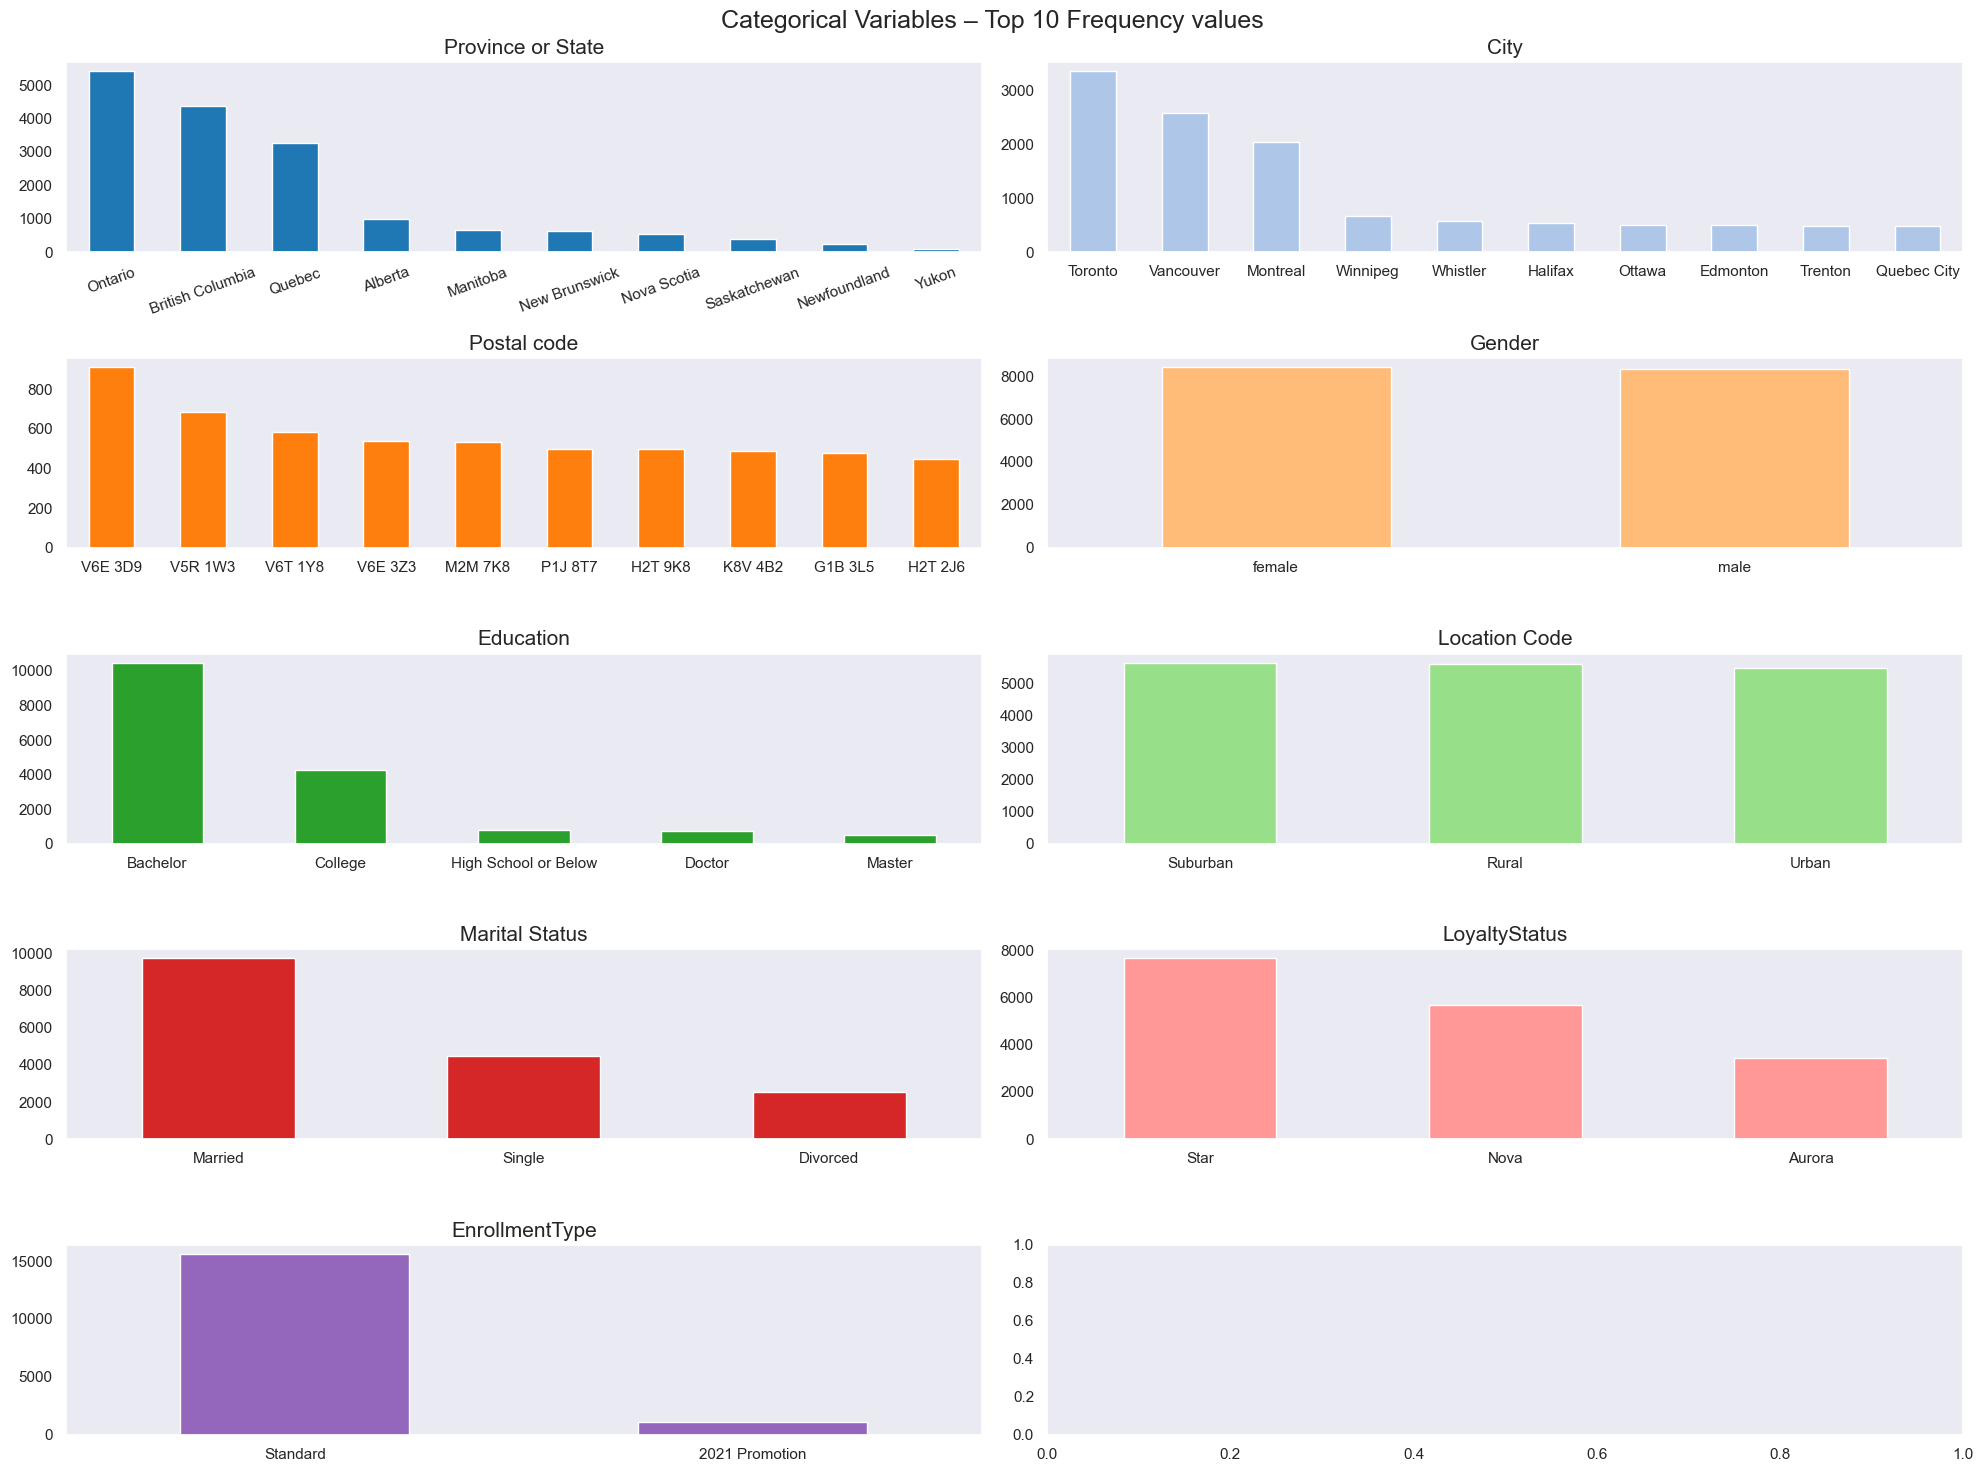

In [85]:
sns.set(style= "dark")

non_metric_features = customer_data.select_dtypes(exclude= np.number).drop(["EnrollmentDateOpening", "CancellationDate",
                                                                            "First Name", "Last Name", "Customer Name", "Country"], axis=1)

palette = sns.color_palette("tab20", n_colors=len(non_metric_features.columns))

fig, axes = plt.subplots(5, 2, figsize=(20, 15))

for ax, feat, color in zip(axes.flatten(), non_metric_features, palette):
    # use df_deps
    customer_data[feat].value_counts().head(10).plot(kind= "bar", ax=ax, color = color)
    ax.set_title(feat, fontsize = 15)

    if feat == "Province or State":
        ax.tick_params(axis="x", rotation=20)
    else:
        ax.tick_params(axis="x", rotation=0)
    
    ax.set_xlabel("")

plt.suptitle("Categorical Variables – Top 10 Frequency values", fontsize=18)
plt.tight_layout()

Insights:

- Most common province or state: "Ontario"

- Most Common City: "Toronto"
 
- In "Education", Bachelor and College are by far the most common ones. 

- Most of the customers are married.

- There is a small group of people that joined in the 2021 promotion, but it can contain interesting insights.

- Need to plot graphs to understand what "LoyaltyStatus" tells us.

Let's see if the education is relevant on our customers.

### "Education"

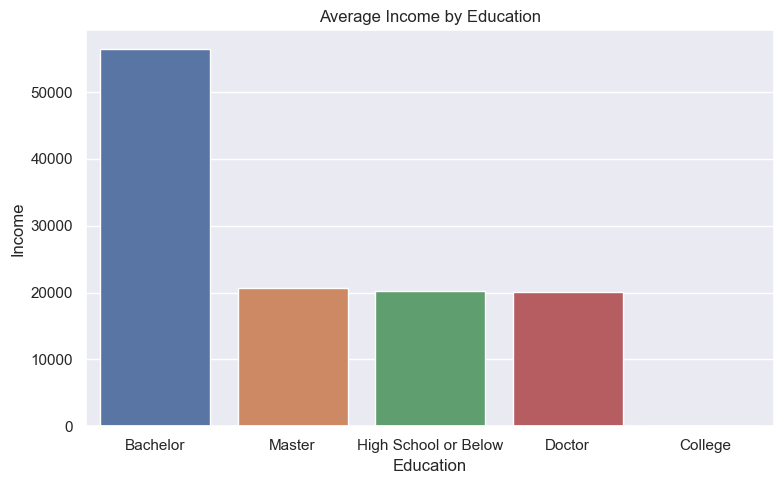

In [86]:
num_per_cat(customer_data, "Income", "Education")

Here we can confirm that the customers with college are the ones with income zero, but they are at the same time, very important customers. This needs to be investigated.

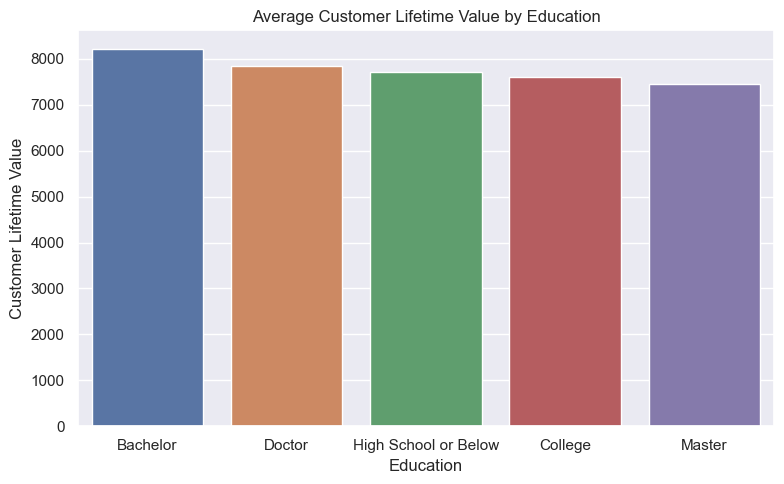

In [87]:
num_per_cat(customer_data, "Customer Lifetime Value", "Education")

Even with the difference in salaries between levels of education, the importance of the customers seems to be independent of the income, as we can see in this graph that the importance of the customers per level of education is roughly the same.

### "LoyaltyStatus"

As said before, we need to understand better what Loyalty status tells us.

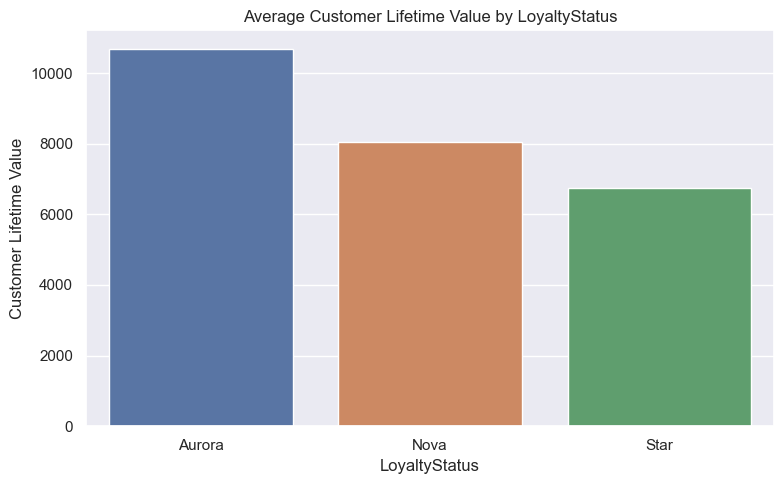

In [88]:
num_per_cat(customer_data, "Customer Lifetime Value", "LoyaltyStatus")

Seems that "LoyaltyStatus" is related with customer value for the company.

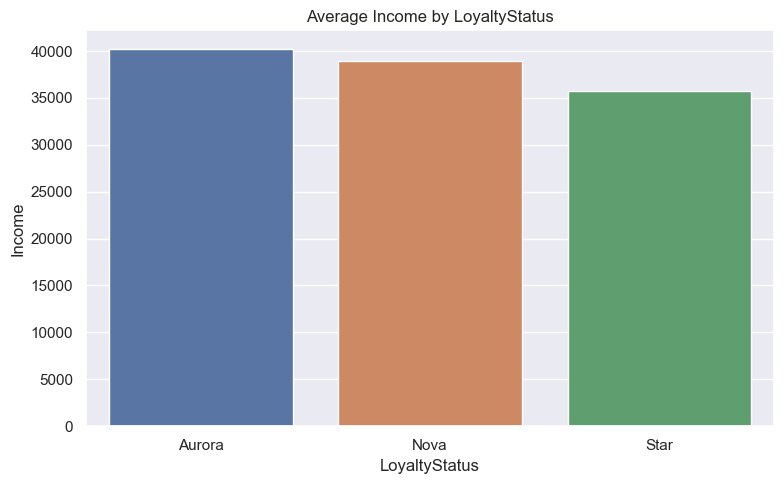

In [89]:
num_per_cat(customer_data, "Income", "LoyaltyStatus")

As expected, the most valuable customers have on average higher incomes as well.

### "Marital Status"

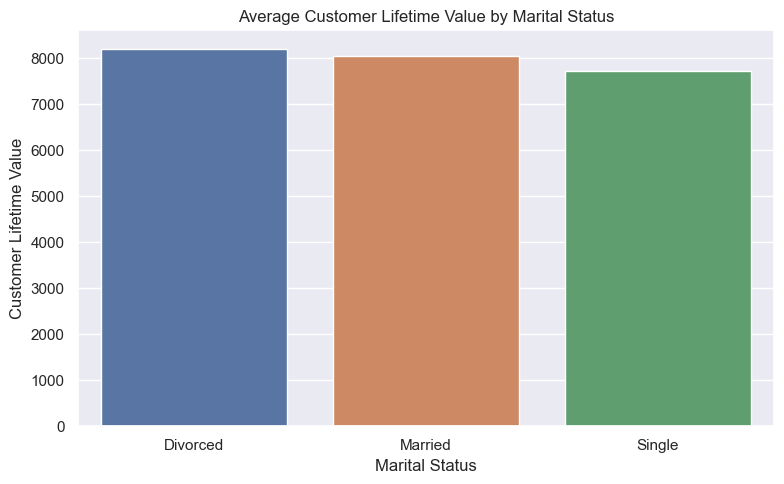

In [90]:
num_per_cat(customer_data, "Customer Lifetime Value", "Marital Status")

There are no big differences in the customer lifetime values mean among the marital status.

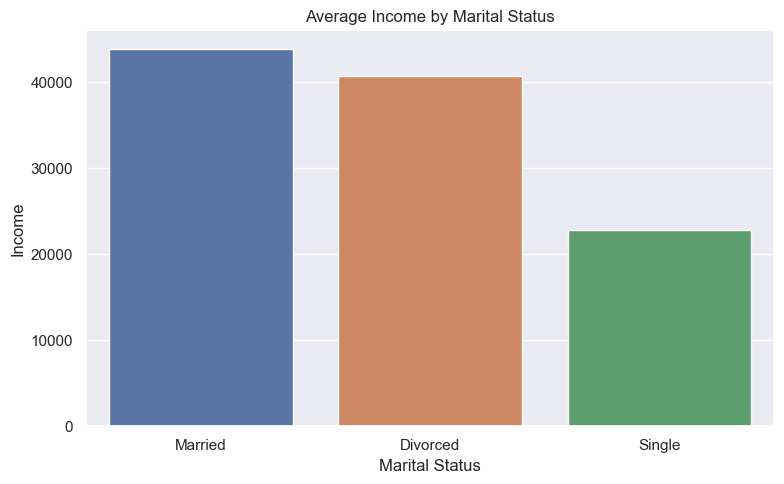

In [91]:
num_per_cat(customer_data, "Income", "Marital Status")

It seems that the "single" customers have lower incomes. This might tell us that this group of customers is on average younger, because as they are in the beggining of their carrer, they have lower incomes.

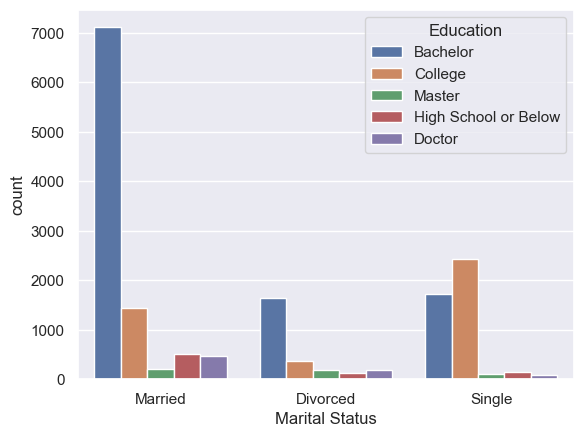

In [92]:
sns.countplot(customer_data, x="Marital Status", hue="Education")
plt.show()

Through this graph, we can confirm that "single" contains the biggest amount of customers with "college", which means it contains most of the customers with 0 income.

 ---
## Bivariate Distributions
 ---

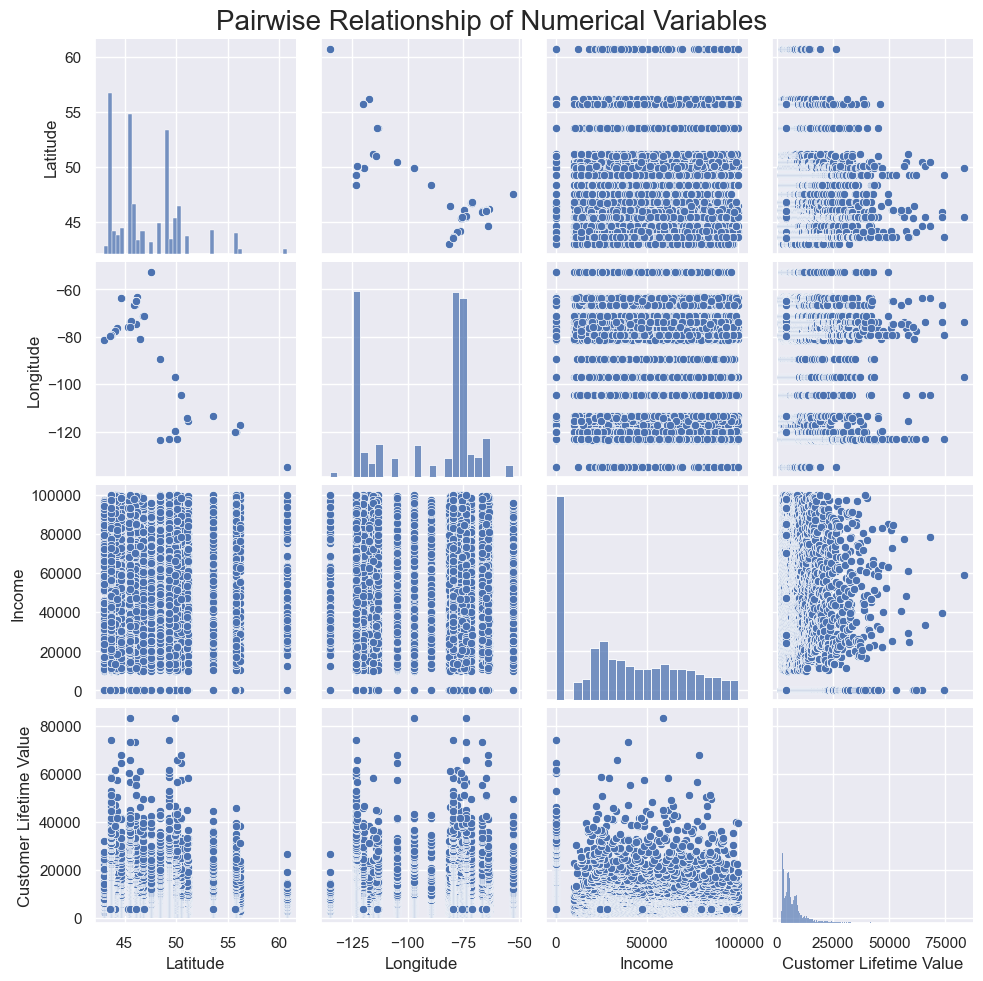

In [93]:
sns.set()

sns.pairplot(metric_features)

plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)
plt.show()


Interesting Insights:

- Through these graphs, we can see that the customers with income equal to zero have, on average, similar customer lifetime values with the ones that have income.

- We can verify that most of the customers with high Customer Lifetime Values have loew "latitude", which means they live closer to the south.

- Because of "Customer Lifetime Value" there are a lot of outliers, but as these customers represent a very important part of our dataset, we'll probably keep them. This need to be verified afterwards after merging both datasets, so we can verify with the flights data.

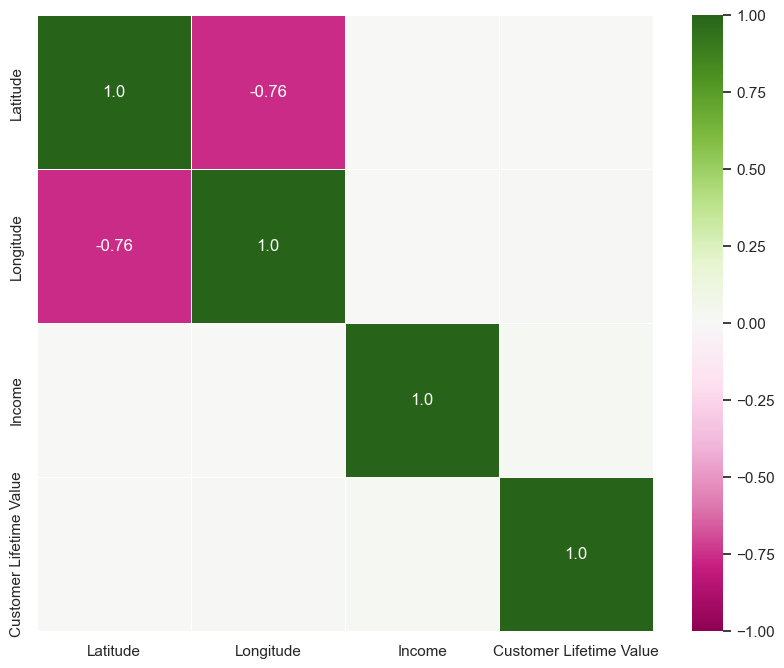

In [94]:
corr = metric_features.corr(method="pearson")
corr = corr.round(2)

mask_annot = np.absolute(corr.values) >= 0.3
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) 


fig = plt.figure(figsize=(10, 8))

sns.heatmap(data=corr, 
            annot=annot, # Specify custom annotation
            fmt='s', # The annotation matrix now has strings, so we need to explicitly say this
            vmin=-1, vmax=1, 
            center=0, # Center the colormap at zero
            square=True, # Make each cell square-shaped
            linewidths=.5, # Add lines between cells
            cmap='PiYG' # Diverging color map
            )

plt.show()


There is no relevant correlation between these variables.

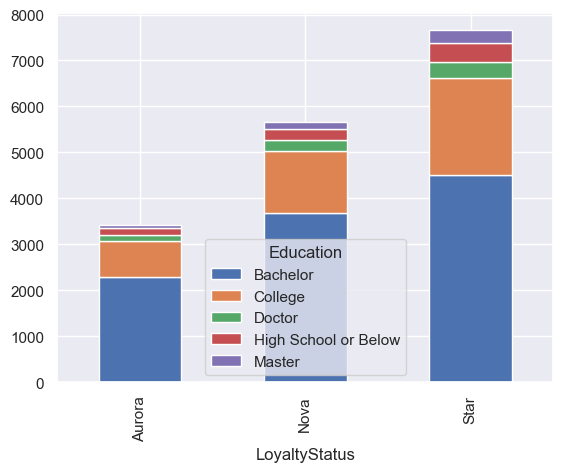

In [95]:
customer_data.groupby(["LoyaltyStatus", "Education"])["Education"].size().unstack().plot.bar(stacked=True)

plt.show()

It isn't possible to verify any big differences on the education between each loyalty status.

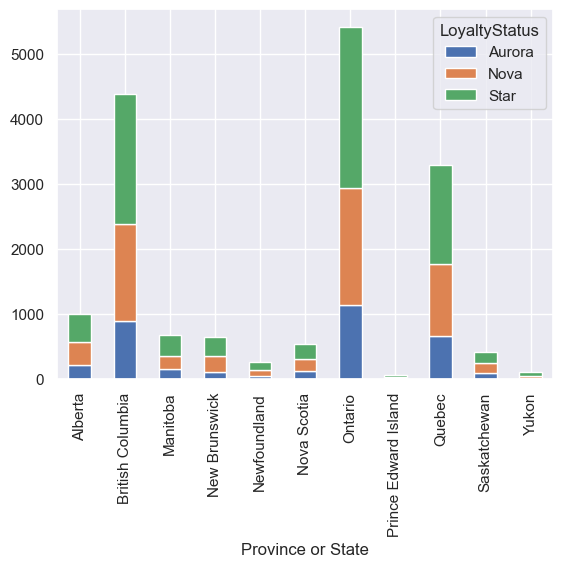

In [96]:
customer_data.groupby(["Province or State", "LoyaltyStatus"])["LoyaltyStatus"].size().unstack().plot.bar(stacked=True)

plt.show()

In this graph, we can verify that there are some provinces or states with a really small number of customer, as there are three that center most of the customer quantity, "British Columbia", "Ontario" and "Quebec". Despite this fact, the distribution of loyalty status among the province or states, relies mostly the same.

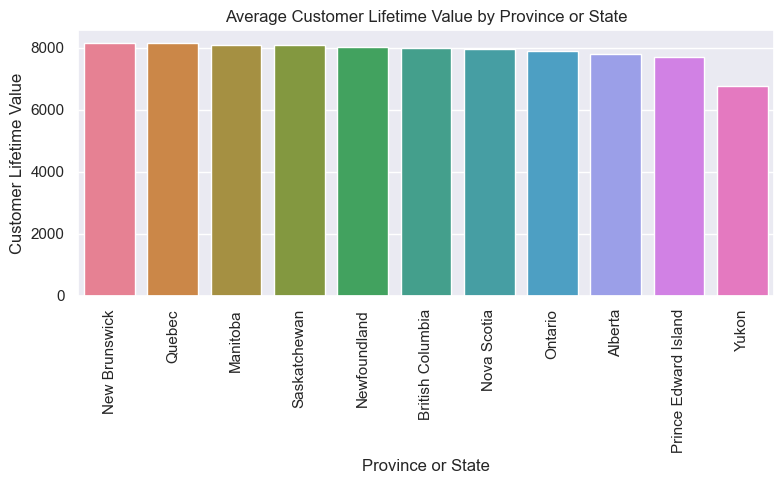

In [97]:
num_per_cat(customer_data, "Customer Lifetime Value", "Province or State", 90)

Seems that there is a state, "Yukon", that has on average less valuable customers.

## Chencking for Possible Data Inconsistencies

In [98]:
customer_data[customer_data["EnrollmentDateOpening"] == customer_data["CancellationDate"]]

Loyalty# First Name Last Name    Customer Name Country  \
3153     488724    Rayford     Vogus    Rayford Vogus  Canada   
12237    871455      Gemma   Gadbois    Gemma Gadbois  Canada   
0        999987      Layla    Murphy     Layla Murphy  Canada   
1        999988       Jana    Parker      Jana Parker  Canada   
2        999989      Ethan    Parker     Ethan Parker  Canada   
3        999990       Ryan  Anderson    Ryan Anderson  Canada   
4        999991     Olivia      Cote      Olivia Cote  Canada   
5        999992       Ella       Roy         Ella Roy  Canada   
6        999993     Elijah      Cook      Elijah Cook  Canada   
7        999994      Ethan      Chan       Ethan Chan  Canada   
8        999995       Liam      Wong        Liam Wong  Canada   
9        999996   Isabella      Ross    Isabella Ross  Canada   
10       999997      Grace    Miller     Grace Miller  Canada   
11       999998       Noah  Thompson    Noah Thompson  Canada   
12       999999       Noah    Walker      Noah Walker  Canada   
13       100017      Grace    Fortin     Grace Fortin  Canada   
14       100011     Amelia      Ross      Amelia Ross  Canada   
15       100012      Ethan  Thompson   Ethan Thompson  Canada   
16       100013      Layla     Young      Layla Young  Canada   
17       100014     Amelia   Bennett   Amelia Bennett  Canada   
18       100015   Benjamin    Wilson  Benjamin Wilson  Canada   
19       100016       Emma    Martin      Emma Martin  Canada   

      Province or State          City   Latitude   Longitude Postal code  \
3153            Ontario       Toronto  43.653225  -79.383186     M2Z 4K1   
12237           Alberta       Calgary  51.048615 -114.070850     T3E 2V9   
0         New Brunswick   Fredericton  46.029263  -66.565150     R4H 2Y2   
1                Quebec      Montreal  45.573672  -73.523012     N6B 1N3   
2               Ontario       Trenton  44.075379  -77.550375     P8F 5C8   
3         New Brunswick       Moncton  46.106617  -64.714267     B6P 6D0   
4         New Brunswick   Fredericton  45.950000  -66.652437     X3W 5N2   
5               Ontario       Toronto  43.706878  -79.437412     P6D 6N2   
6      British Columbia  Dawson Creek  55.701475 -120.181716     W6H 0Z7   
7               Ontario        Ottawa  45.365906  -75.723181     B2F 3E1   
8               Ontario        Ottawa  45.471557  -75.704868     B3A 2R0   
9               Ontario       Toronto  43.690489  -79.436758     B4W 4M6   
10        New Brunswick       Moncton  46.067243  -64.729480     S5R 0X5   
11               Quebec   Quebec City  46.749897  -71.238050     K7T 9I9   
12              Alberta      Edmonton  53.549353 -113.509109     S7D 0V1   
13     British Columbia  Dawson Creek  55.751178 -120.264920     E0K 5I2   
14              Ontario       Toronto  43.593187  -79.444335     W9D 4Q9   
15               Quebec   Quebec City  46.759733  -71.141009     Y0C 7D6   
16              Alberta      Edmonton  53.524829 -113.546357     L3S 9Y3   
17        New Brunswick       Moncton  46.051866  -64.825428     G2S 2B6   
18               Quebec   Quebec City  46.862970  -71.133444     B1Z 8T3   
19     British Columbia  Dawson Creek  55.720562 -120.160090     M4A 1E4   

       Gender Education Location Code   Income Marital Status LoyaltyStatus  \
3153     male  Bachelor      Suburban  36495.0        Married        Aurora   
12237    male    Doctor      Suburban  16269.0       Divorced          Star   
0      female  Bachelor         Urban      NaN         Single          Star   
1        male   College         Rural      NaN         Single          Star   
2        male   College         Rural      NaN        Married          Star   
3      female   College         Rural      NaN        Married          Star   
4      female   College      Suburban      NaN        Married          Star   
5        male   College      Suburban      NaN         Single          Star   
6      female   College      Suburban      NaN     

Seems that the missing values in the columns "Income" and "Customer Lifetime Value" are directly related to the case where customers joined and canceled the program in the same day. These customer are expected to have no flights data, and for that reason they might be deleted in the future, but for that, we need to first merge the datatsets and check if this was an error, or they never really had flights with the company.

Now, we'll check if there is the incosistency of having costumer that joined in the 2021 promotion, but their enrollment date is before 2021.

In [99]:
print(f"Number of customer that joined before 2021 and are in the 2021 promo: {len(customer_data[(customer_data['EnrollmentType'] == '2021 Promotion') & (customer_data['EnrollmentDateOpening'].dt.year < 2021)])} out of {len(customer_data[customer_data['EnrollmentType'] == '2021 Promotion'])}")
customer_data[(customer_data["EnrollmentType"] == "2021 Promotion") & (customer_data["EnrollmentDateOpening"].dt.year < 2021)]
# Customers that enrroled in 2021 promo but are in the program before 2021

Number of customer that joined before 2021 and are in the 2021 promo: 172 out of 1143


Loyalty# First Name  Last Name    Customer Name Country  \
4        530508     Claire    Latting   Claire Latting  Canada   
67       329382       Ngoc  Dubuisson   Ngoc Dubuisson  Canada   
231      557500      Coral   Precythe   Coral Precythe  Canada   
353      655743   Elfrieda       Hash    Elfrieda Hash  Canada   
648      121935      Lesia    Droesch    Lesia Droesch  Canada   
...         ...        ...        ...              ...     ...   
16610    270901  Ernestina       Iida   Ernestina Iida  Canada   
16663    254372     Elnora       Oats      Elnora Oats  Canada   
16687    502670      Bella     Bluett     Bella Bluett  Canada   
16790    959793     Darrin   Dierking  Darrin Dierking  Canada   
16846    376299    Leandro       Ripp     Leandro Ripp  Canada   

      Province or State        City   Latitude   Longitude Postal code  \
4                Quebec        Hull  45.428730  -75.713364     J8Y 3Z5   
67               Quebec    Montreal  45.501690  -73.567253     H2T 9K8   
231             Ontario     Toronto  43.653225  -79.383186     M1R 4K3   
353              Quebec    Montreal  45.501690  -73.567253     H2T 2J6   
648               Yukon  Whitehorse  60.721188 -135.056840     Y2K 6R0   
...                 ...         ...        ...         ...         ...   
16610           Ontario    Kingston  44.231171  -76.485954     M9K 2P4   
16663           Ontario     Toronto  43.653225  -79.383186     M2Z 4K1   
16687            Quebec    Montreal  45.501690  -73.567253     H2T 9K8   
16790           Ontario     Toronto  43.653225  -79.383186     P5S 6R4   
16846           Ontario     Trenton  44.101128  -77.576309     K8V 4B2   

       Gender             Education Location Code   Income Marital Status  \
4        male              Bachelor      Suburban  97832.0        Married   
67       male               College      Suburban      0.0         Single   
231    female              Bachelor         Urban  24188.0        Married   
353    female  High School or Below         Urban  20284.0         Single   
648    female                Doctor      Suburban  29950.0        Married   
...       ...                   ...           ...      ...            ...   
16610  female               College         Urban      0.0         Single   
16663    male              Bachelor         Urban  84365.0        Married   
16687    male               College         Urban      0.0        Married   
16790    male              Bachelor      Suburban  68906.0        Married   
16846  female               College         Urban      0.0        Married   

      LoyaltyStatus EnrollmentDateOpening CancellationDate  \
4              Star            2017-10-25              NaT   
67             Star            2015-08-27              NaT   
231            Star            2018-11-04              NaT   
353            Star            2016-07-24              NaT   
648            Star            2018-10-19              NaT   
...             ...                   ...              ...   
16610          Star            2016-09-16              NaT   
16663          Star            2018-07-14              NaT   
16687          Star            2019-02-08              NaT   
16790          Star            2018-02-25              NaT   
16846          Star            2017-01-12              NaT   

       Customer Lifetime Value  EnrollmentType  
4                      3842.79  2021 Promotion  
67                     3961.59  2021 Promotion  
231                    4305.81  2021 Promotion  
353                    4505.85  2021 Promotion  
648                    4878.83  2021 Promotion  
...                        ...             ...  
16610                 22315.06  2021 Promotion  
16663                 23981.54  2021 Promotion  
16687                 24552.87  2021 Promotion  
16790                 30118.66  2021 Promotion  
16846                 35013.54  2021 Promotion  

[172 rows x 20 columns]

We can either:

- Check with the fligths data if they have flights before 2021 and see if it was a mistake and the year should be 2021.

- Change the enrollment type to standard.

- Delete them.

## Feature Engeneering

### "rejoined_program"

Now we are going to create a column that retains the information where we have 1 in the rows the cancelation date in before the enrollment date, otherwise it has 0. This will represent the customers that rejoined the program.

In [100]:
customer_data[(customer_data["EnrollmentDateOpening"] > customer_data["CancellationDate"])|(customer_data["EnrollmentDateOpening"] == 2021)]

Loyalty# First Name    Last Name        Customer Name Country  \
72       357549     Elisha        Furna         Elisha Furna  Canada   
77       265297     Ebonie        Radde         Ebonie Radde  Canada   
176      845613     Jerald      Shiring       Jerald Shiring  Canada   
210      830547     Dortha        Detar         Dortha Detar  Canada   
304      514900      Edith      Forslin        Edith Forslin  Canada   
...         ...        ...          ...                  ...     ...   
16514    584796   Julieann   Mclaughlan  Julieann Mclaughlan  Canada   
16522    774931       Cira       Defide          Cira Defide  Canada   
16551    275807     Arturo     Michaeli      Arturo Michaeli  Canada   
16634    433307     Lyndon  Vogelgesang   Lyndon Vogelgesang  Canada   
16757    893127     Bernie        Morea         Bernie Morea  Canada   

      Province or State       City   Latitude   Longitude Postal code  Gender  \
72     British Columbia   Whistler  50.116322 -122.957360     V6T 1Y8  female   
77             Manitoba   Winnipeg  49.895138  -97.138374     R2C 0M5  female   
176              Quebec   Montreal  45.501690  -73.567253     H2Y 4R4    male   
210    British Columbia  Vancouver  49.282730 -123.120740     V5R 1W3    male   
304             Ontario    Toronto  43.653225  -79.383186     P1L 8X8  female   
...                 ...        ...        ...         ...         ...     ...   
16514  British Columbia  Vancouver  49.282730 -123.120740     V6E 3D9    male   
16522  British Columbia   Whistler  50.116322 -122.957360     V6T 1Y8  female   
16551          Manitoba   Winnipeg  49.895138  -97.138374     R2C 0M5  female   
16634          Manitoba   Winnipeg  49.895138  -97.138374     R2C 0M5    male   
16757  British Columbia  Vancouver  49.282730 -123.120740     V6E 3D9  female   

      Education Location Code   Income Marital Status LoyaltyStatus  \
72     Bachelor         Rural  60817.0         Single          Star   
77     Bachelor         Urban  39101.0        Married          Star   
176    Bachelor         Urban  30598.0        Married          Star   
210    Bachelor         Rural  26245.0         Single          Star   
304    Bachelor         Urban  80892.0        Married          Star   
...         ...           ...      ...            ...           ...   
16514  Bachelor         Rural  59853.0         Single          Star   
16522  Bachelor         Rural  33588.0        Married          Star   
16551  Bachelor         Urban  71467.0       Divorced          Star   
16634  Bachelor      Suburban  80540.0        Married          Star   
16757  Bachelor         Urban  33806.0       Divorced          Star   

      EnrollmentDateOpening CancellationDate  Customer Lifetime Value  \
72               2021-09-21       2019-05-21                  3964.73   
77               2021-07-17       2019-03-17                  3978.67   
176              2021-10-13       2019-06-13                  4198.03   
210              2021-05-11       2019-01-11                  4271.20   
304              2021-07-20       2019-03-20                  4425.91   
...                     ...              ...                      ...   
16514            2021-08-18       2019-04-18                 19454.41   
16522            2021-07-21       2019-03-21                 19731.34   
16551            2021-10-18       2019-06-18                 20446.60   
16634            2021-08-03       2019-04-03                 22758.91   
16757            2021-08-20       2019-04-20                 27789.69   

      EnrollmentType  
72          Standard  
77          Standard  
176         Standard  
210         Standard  
304         Standard  
...              ...  
16514       Standard  
16522       Standard  
16551       Standard  
16634       Standard  
16757       Standard  

[201 rows x 20 columns]

These seem to be customers that rejoined the comnpany, so we can create a variable that assigns if this happened.

In [101]:
customer_data["rejoined_program"] = np.where(
    customer_data["EnrollmentDateOpening"] > customer_data["CancellationDate"], 1, 0)

### "Days_in_program"

As average customer lifetime span is a variable that is present in the equation to calculate customer lifetime value, we'll create the variable Days_in_program.

In [102]:
print(customer_data["EnrollmentDateOpening"].sort_values(ascending=False).reset_index(drop=True)[0])
print(customer_data["CancellationDate"].sort_values(ascending=False).reset_index(drop=True)[0])

2021-12-30 00:00:00
2021-12-30 00:00:00


We'll use the "2021-12-30" date as a timestamp, cause it's the last date we have access in this dataset.

In [103]:
reference_date = pd.Timestamp("2021-12-30")

#Defining the new variable
customer_data["Days_in_prog"] = np.where(
    customer_data["CancellationDate"].isna(),
    (reference_date - customer_data["EnrollmentDateOpening"]).dt.days,
    (customer_data["CancellationDate"] - customer_data["EnrollmentDateOpening"]).dt.days
)
#Cleaning up a special case where cancelation date is before the enrollment date

mask = customer_data["CancellationDate"] < customer_data["EnrollmentDateOpening"]

customer_data.loc[mask, "Days_in_prog"] = (
    reference_date - customer_data.loc[mask, "EnrollmentDateOpening"]
).dt.days
customer_data.head()

Loyalty# First Name    Last Name        Customer Name Country  \
0    480934    Cecilia  Householder  Cecilia Householder  Canada   
1    549612      Dayle        Menez          Dayle Menez  Canada   
2    429460     Necole       Hannon        Necole Hannon  Canada   
3    608370      Queen        Hagee          Queen Hagee  Canada   
4    530508     Claire      Latting       Claire Latting  Canada   

  Province or State       City   Latitude   Longitude Postal code  Gender  \
0           Ontario    Toronto  43.653225  -79.383186     M2Z 4K1  female   
1           Alberta   Edmonton  53.544388 -113.490930     T3G 6Y6    male   
2  British Columbia  Vancouver  49.282730 -123.120740     V6E 3D9    male   
3           Ontario    Toronto  43.653225  -79.383186     P1W 1K4    male   
4            Quebec       Hull  45.428730  -75.713364     J8Y 3Z5    male   

  Education Location Code   Income Marital Status LoyaltyStatus  \
0  Bachelor         Urban  70146.0        Married          Star   
1   College         Rural      0.0       Divorced          Star   
2   College         Urban      0.0         Single          Star   
3   College      Suburban      0.0         Single          Star   
4  Bachelor      Suburban  97832.0        Married          Star   

  EnrollmentDateOpening CancellationDate  Customer Lifetime Value  \
0            2019-02-15              NaT                  3839.14   
1            2019-03-09              NaT                  3839.61   
2            2017-07-14       2021-01-08                  3839.75   
3            2016-02-17              NaT                  3839.75   
4            2017-10-25              NaT                  3842.79   

   EnrollmentType  rejoined_program  Days_in_prog  
0        Standard                 0        1049.0  
1        Standard                 0        1027.0  
2        Standard                 0        1274.0  
3        Standard                 0        2143.0  
4  2021 Promotion                 0        1527.0

### "Cancelled_program"

We'll create a variable that tells us if the client has left the loyalty program or not.

In [104]:
customer_data["Cancelled_program"] = np.where(customer_data["CancellationDate"] > customer_data["EnrollmentDateOpening"], 1, 0)
customer_data.head()

Loyalty# First Name    Last Name        Customer Name Country  \
0    480934    Cecilia  Householder  Cecilia Householder  Canada   
1    549612      Dayle        Menez          Dayle Menez  Canada   
2    429460     Necole       Hannon        Necole Hannon  Canada   
3    608370      Queen        Hagee          Queen Hagee  Canada   
4    530508     Claire      Latting       Claire Latting  Canada   

  Province or State       City   Latitude   Longitude Postal code  Gender  \
0           Ontario    Toronto  43.653225  -79.383186     M2Z 4K1  female   
1           Alberta   Edmonton  53.544388 -113.490930     T3G 6Y6    male   
2  British Columbia  Vancouver  49.282730 -123.120740     V6E 3D9    male   
3           Ontario    Toronto  43.653225  -79.383186     P1W 1K4    male   
4            Quebec       Hull  45.428730  -75.713364     J8Y 3Z5    male   

  Education Location Code   Income Marital Status LoyaltyStatus  \
0  Bachelor         Urban  70146.0        Married          Star   
1   College         Rural      0.0       Divorced          Star   
2   College         Urban      0.0         Single          Star   
3   College      Suburban      0.0         Single          Star   
4  Bachelor      Suburban  97832.0        Married          Star   

  EnrollmentDateOpening CancellationDate  Customer Lifetime Value  \
0            2019-02-15              NaT                  3839.14   
1            2019-03-09              NaT                  3839.61   
2            2017-07-14       2021-01-08                  3839.75   
3            2016-02-17              NaT                  3839.75   
4            2017-10-25              NaT                  3842.79   

   EnrollmentType  rejoined_program  Days_in_prog  Cancelled_program  
0        Standard                 0        1049.0                  0  
1        Standard                 0        1027.0                  0  
2        Standard                 0        1274.0                  1  
3        Standard                 0        2143.0                  0  
4  2021 Promotion                 0        1527.0                  0

### "Enrollment_year"

Now, we'll create a column where we retain the year the customer joined the program, so we have a way to keep that information, as the datetime can't be use in CLustering models.

In [105]:
customer_data["Enrollment_year"] = customer_data["EnrollmentDateOpening"].dt.year
customer_data.head()

Loyalty# First Name    Last Name        Customer Name Country  \
0    480934    Cecilia  Householder  Cecilia Householder  Canada   
1    549612      Dayle        Menez          Dayle Menez  Canada   
2    429460     Necole       Hannon        Necole Hannon  Canada   
3    608370      Queen        Hagee          Queen Hagee  Canada   
4    530508     Claire      Latting       Claire Latting  Canada   

  Province or State       City   Latitude   Longitude Postal code  Gender  \
0           Ontario    Toronto  43.653225  -79.383186     M2Z 4K1  female   
1           Alberta   Edmonton  53.544388 -113.490930     T3G 6Y6    male   
2  British Columbia  Vancouver  49.282730 -123.120740     V6E 3D9    male   
3           Ontario    Toronto  43.653225  -79.383186     P1W 1K4    male   
4            Quebec       Hull  45.428730  -75.713364     J8Y 3Z5    male   

  Education Location Code   Income Marital Status LoyaltyStatus  \
0  Bachelor         Urban  70146.0        Married          Star   
1   College         Rural      0.0       Divorced          Star   
2   College         Urban      0.0         Single          Star   
3   College      Suburban      0.0         Single          Star   
4  Bachelor      Suburban  97832.0        Married          Star   

  EnrollmentDateOpening CancellationDate  Customer Lifetime Value  \
0            2019-02-15              NaT                  3839.14   
1            2019-03-09              NaT                  3839.61   
2            2017-07-14       2021-01-08                  3839.75   
3            2016-02-17              NaT                  3839.75   
4            2017-10-25              NaT                  3842.79   

   EnrollmentType  rejoined_program  Days_in_prog  Cancelled_program  \
0        Standard                 0        1049.0                  0   
1        Standard                 0        1027.0                  0   
2        Standard                 0        1274.0                  1   
3        Standard                 0        2143.0                  0   
4  2021 Promotion                 0        1527.0                  0   

   Enrollment_year  
0             2019  
1             2019  
2             2017  
3             2016  
4             2017

### "Enrollment_month"

In the segment, we'll do the same as in the last engeneered featured, but for the month.

In [106]:
customer_data["Enrollment_month"] = customer_data["EnrollmentDateOpening"].dt.month
customer_data.head()

Loyalty# First Name    Last Name        Customer Name Country  \
0    480934    Cecilia  Householder  Cecilia Householder  Canada   
1    549612      Dayle        Menez          Dayle Menez  Canada   
2    429460     Necole       Hannon        Necole Hannon  Canada   
3    608370      Queen        Hagee          Queen Hagee  Canada   
4    530508     Claire      Latting       Claire Latting  Canada   

  Province or State       City   Latitude   Longitude Postal code  Gender  \
0           Ontario    Toronto  43.653225  -79.383186     M2Z 4K1  female   
1           Alberta   Edmonton  53.544388 -113.490930     T3G 6Y6    male   
2  British Columbia  Vancouver  49.282730 -123.120740     V6E 3D9    male   
3           Ontario    Toronto  43.653225  -79.383186     P1W 1K4    male   
4            Quebec       Hull  45.428730  -75.713364     J8Y 3Z5    male   

  Education Location Code   Income Marital Status LoyaltyStatus  \
0  Bachelor         Urban  70146.0        Married          Star   
1   College         Rural      0.0       Divorced          Star   
2   College         Urban      0.0         Single          Star   
3   College      Suburban      0.0         Single          Star   
4  Bachelor      Suburban  97832.0        Married          Star   

  EnrollmentDateOpening CancellationDate  Customer Lifetime Value  \
0            2019-02-15              NaT                  3839.14   
1            2019-03-09              NaT                  3839.61   
2            2017-07-14       2021-01-08                  3839.75   
3            2016-02-17              NaT                  3839.75   
4            2017-10-25              NaT                  3842.79   

   EnrollmentType  rejoined_program  Days_in_prog  Cancelled_program  \
0        Standard                 0        1049.0                  0   
1        Standard                 0        1027.0                  0   
2        Standard                 0        1274.0                  1   
3        Standard                 0        2143.0                  0   
4  2021 Promotion                 0        1527.0                  0   

   Enrollment_year  Enrollment_month  
0             2019                 2  
1             2019                 3  
2             2017                 7  
3             2016                 2  
4             2017                10

Now that we have created a column to capture the enrollment year and the enrollment month, we can plot a graph to check if there is any seasonalizaty in the enrollment.

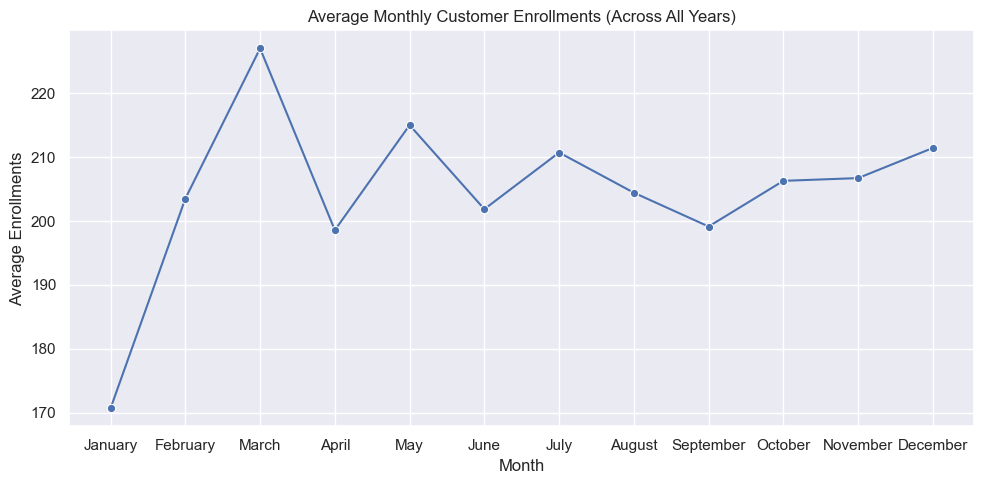

In [130]:
monthly_avg = (
    customer_data
    .groupby(["Enrollment_year", "Enrollment_month"])
    .size()
    .groupby("Enrollment_month")
    .mean()
)
# Create ordered labels
month_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]

# Replace index with readable month names
monthly_avg.index = month_order

plt.figure(figsize=(10,5))
sns.lineplot(x=month_order, y=monthly_avg.values, marker="o")
plt.title("Average Monthly Customer Enrollments (Across All Years)")
plt.xlabel("Month")
plt.ylabel("Average Enrollments")
plt.grid(True)
plt.tight_layout()
plt.show()

The chart shows the average number of customer enrollments for each month across all years. A clear seasonal pattern is visible:

- March has the highest average enrollment, peaking noticeably above all other months.

- January shows the lowest average, indicating slower enrollment activity at the beginning of the year.

- From May to November, enrollments remain relatively stable, with only small monthly fluctuations.

- The overall trend suggests stronger enrollment activity in late winter and early spring, followed by a stable mid-year period.

# GeoData

In [107]:
# Create a new DataFrame with selected columns from customer_info
customer_location = customer_data.loc[:, ['Loyalty#', 'Customer Name', 'Latitude', 'Longitude']].copy()

# Display the customer_location DataFrame
customer_location

Loyalty#        Customer Name   Latitude   Longitude
0     480934  Cecilia Householder  43.653225  -79.383186
1     549612          Dayle Menez  53.544388 -113.490930
2     429460        Necole Hannon  49.282730 -123.120740
3     608370          Queen Hagee  43.653225  -79.383186
4     530508       Claire Latting  45.428730  -75.713364
..       ...                  ...        ...         ...
15    100012       Ethan Thompson  46.759733  -71.141009
16    100013          Layla Young  53.524829 -113.546357
17    100014       Amelia Bennett  46.051866  -64.825428
18    100015      Benjamin Wilson  46.862970  -71.133444
19    100016          Emma Martin  55.720562 -120.160090

[16757 rows x 4 columns]

In [108]:
# Set the Mapbox access token
px.set_mapbox_access_token('pk.eyJ1IjoiYXJjYWRldGUyMSIsImEiOiJjbGY5cXlkY3oxcnp1NDBvNHNyM3MwZm9mIn0.sN_CBzeTj04J0BRjr3DJyw')

# Create a scatter mapbox plot using the customer_location DataFrame
fig = px.scatter_mapbox(customer_location, 
                        lat = 'Latitude', 
                        lon = 'Longitude', 
                        hover_name = 'Customer Name', 
                        color_discrete_sequence = ['green', 'silver'],
                        zoom = 10, 
                        height = 500,
                        width = 800,
                        opacity = 0.1
                        )

# Customize the layout of the figure
fig.update_layout(mapbox_style = 'dark', 
                  margin = {'r': 0, 't': 0, 'l': 0, 'b': 0},
                  legend_title_text = 'Group', 
                  legend_title_font_color = 'black',
                  legend_orientation = 'h', 
                  legend_y = 0
                  )

# Display the figure
fig.show()

In [109]:
# Set the Mapbox access token
px.set_mapbox_access_token('pk.eyJ1IjoiYXJjYWRldGUyMSIsImEiOiJjbGY5cXlkY3oxcnp1NDBvNHNyM3MwZm9mIn0.sN_CBzeTj04J0BRjr3DJyw')

# Create a scatter mapbox plot using the customer_location DataFrame
fig = px.scatter_mapbox(customer_location, 
                        lat = 'Latitude', 
                        lon = 'Longitude', 
                        hover_name = 'Customer Name', 
                        color_discrete_sequence = ['green', 'silver'],
                        zoom = 10, 
                        height = 500,
                        width = 800,
                        opacity = 0.1
                        )

# Customize the layout of the figure
fig.update_layout(mapbox_style = 'dark', 
                  margin = {'r': 0, 't': 0, 'l': 0, 'b': 0},
                  legend_title_text = 'Group', 
                  legend_title_font_color = 'black',
                  legend_orientation = 'h', 
                  legend_y = 0
                  )

# Display the figure
fig.show()

We will try now to create a region category that will insert a customer based on their location, to retrieve a better insight instead of having a discrete latitude/longitude data. We will try to keep the amount of clusters to minimal, in order to minimize the dimensionality, when inputting our data into the training model.

Our first strategy will be to try to cluster our customers based on 6-8 clusters using KMeans

In [110]:
# Select the data you want to cluster (Latitude and Longitude)
X = customer_location[['Latitude', 'Longitude']]

# Create a KMeans model and specify you want 5 clusters
# We use random_state=42 to make the results reproducible
kmeans = KMeans(n_clusters=8, random_state=42, n_init=50)

# Fit the model to your data and get the cluster labels
customer_location['Cluster'] = kmeans.fit_predict(X)

# Convert the cluster labels (which are numbers 0-4) to strings
# This makes Plotly treat them as categories for coloring
customer_location['Cluster'] = customer_location['Cluster'].astype(str)

# Display the DataFrame with the new 'Cluster' column
print(customer_location.head())

   Loyalty#        Customer Name   Latitude   Longitude Cluster
0    480934  Cecilia Householder  43.653225  -79.383186       1
1    549612          Dayle Menez  53.544388 -113.490930       5
2    429460        Necole Hannon  49.282730 -123.120740       2
3    608370          Queen Hagee  43.653225  -79.383186       1
4    530508       Claire Latting  45.428730  -75.713364       4


In [111]:
# Set the Mapbox access token (as you did before)
px.set_mapbox_access_token('pk.eyJ1IjoiYXJjYWRldGUyMSIsImEiOiJjbGY5cXlkY3oxcnp1NDBvNHNyM3MwZm9mIn0.sN_CBzeTj04J0BRjr3DJyw')

# Create the scatter mapbox plot
fig = px.scatter_mapbox(customer_location, 
                        lat='Latitude', 
                        lon='Longitude', 
                        hover_name='Customer Name', 
                        color='Cluster',  # <-- This is the key change!
                        zoom=3,           # <-- Zoomed out to see all of Canada
                        height=500,
                        width=800,
                        opacity=0.8       # <-- Increased opacity to see colors
                       )

# Customize the layout
fig.update_layout(mapbox_style='dark', 
                  margin={'r': 0, 't': 0, 'l': 0, 'b': 0},
                  legend_title_text='Customer Cluster', # <-- Updated title
                  legend_orientation='h', 
                  legend_y=0
                 )

# Display the figure
fig.show()

Even though the results look promising, we feel like the clusters could be better organized. We will try a different strategy based on density (DBScan)

In [112]:
# Copy the DataFrame for this new method
customer_density = customer_location.loc[:, ['Customer Name', 'Latitude', 'Longitude']].copy()

# Get the coordinates for clustering
X = customer_density[['Latitude', 'Longitude']]

db = DBSCAN(eps=4.6, min_samples=5)
clusters = db.fit_predict(X)

customer_density['Cluster'] = clusters

print(customer_density['Cluster'].value_counts())

Cluster
0    9676
1    4819
5     674
3     555
6     409
7     258
4     256
2     110
Name: count, dtype: int64


In [113]:
# Convert cluster numbers to strings for Plotly
customer_density['Cluster'] = customer_density['Cluster'].astype(str)

# Rename the '-1' cluster to 'Outlier (Noise)' for a clearer legend
customer_density['Cluster'] = customer_density['Cluster'].replace('-1', 'Outlier (Noise)')

# Set the Mapbox access token
px.set_mapbox_access_token('pk.eyJ1IjoiYXJjYWRldGUyMSIsImEiOiJjbGY5cXlkY3oxcnp1NDBvNHNyM3MwZm9mIn0.sN_CBzeTj04J0BRjr3DJyw')

# Create the scatter mapbox plot
fig = px.scatter_mapbox(customer_density, 
                        lat='Latitude', 
                        lon='Longitude', 
                        hover_name='Customer Name', 
                        color='Cluster',  # Color by the new density clusters
                        zoom=3,           # Zoom out to see all of Canada
                        height=500,
                        width=800,
                        opacity=0.8
                       )

# Customize the layout
fig.update_layout(mapbox_style='dark', 
                  margin={'r': 0, 't': 0, 'l': 0, 'b': 0},
                  legend_title_text='Density Cluster',
                  legend_orientation='h', 
                  legend_y=0
                 )

# Display the figure
fig.show()

After analyzing the results, we have concluded that the best clustering method here presented will be the KMeans, after looking at the DBScan´s clustering options.

In [114]:
df_clean = pd.merge(
    customer_data,
    customer_location,
    on=['Loyalty#', 'Customer Name', 'Latitude', 'Longitude'],
    how='left'
)

In [115]:
df_clean.head(3)

Loyalty# First Name    Last Name        Customer Name Country  \
0    480934    Cecilia  Householder  Cecilia Householder  Canada   
1    549612      Dayle        Menez          Dayle Menez  Canada   
2    429460     Necole       Hannon        Necole Hannon  Canada   

  Province or State       City   Latitude   Longitude Postal code  Gender  \
0           Ontario    Toronto  43.653225  -79.383186     M2Z 4K1  female   
1           Alberta   Edmonton  53.544388 -113.490930     T3G 6Y6    male   
2  British Columbia  Vancouver  49.282730 -123.120740     V6E 3D9    male   

  Education Location Code   Income Marital Status LoyaltyStatus  \
0  Bachelor         Urban  70146.0        Married          Star   
1   College         Rural      0.0       Divorced          Star   
2   College         Urban      0.0         Single          Star   

  EnrollmentDateOpening CancellationDate  Customer Lifetime Value  \
0            2019-02-15              NaT                  3839.14   
1            2019-03-09              NaT                  3839.61   
2            2017-07-14       2021-01-08                  3839.75   

  EnrollmentType  rejoined_program  Days_in_prog  Cancelled_program  \
0       Standard                 0        1049.0                  0   
1       Standard                 0        1027.0                  0   
2       Standard                 0        1274.0                  1   

   Enrollment_year  Enrollment_month Cluster  
0             2019                 2       1  
1             2019                 3       5  
2             2017                 7       2